In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import xarray as xr
import pandas as pandas
from matplotlib.dates import DateFormatter
#from gamap_colormap import WhGrYlRd
import warnings; warnings.filterwarnings("ignore")
import datetime
import cartopy.crs as ccrs
from matplotlib import dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
from cartopy.util import add_cyclic_point

# Note

I printed out the results presented in Table 1 of the GRL paper where I've listed "TABLE 1 RESULTS" below

In [2]:
# Open all of the output variables as xarray datasets

novolc_DryDep             = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.DryDep.2013.nc4")
novolc_RRTMG              = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.RRTMG.2013.nc4")
novolc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.SpeciesConc.2013.nc4")
novolc_StateMet           = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.StateMet.2013.nc4")
novolc_ProdLoss           = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.ProdLoss.2013.nc4")
novolc_WetLossConv        = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.WetLossConv.2013.nc4")
novolc_WetLossLS          = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.WetLossLS.2013.nc4")
# novolc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi_novolc/HEMCO_diagnostics.2013.nc")

volc_DryDep             = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.DryDep.2013.nc4")
volc_RRTMG              = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.RRTMG.2013.nc4")
volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.SpeciesConc.2013.nc4")
volc_StateMet           = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.StateMet.2013.nc4")
volc_ProdLoss           = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.ProdLoss.2013.nc4")
volc_WetLossConv        = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.WetLossConv.2013.nc4")
volc_WetLossLS          = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.WetLossLS.2013.nc4")
# volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi/HEMCO_diagnostics.2013.nc")

met07_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/met07_volc/GEOSChem.RRTMG.2007.nc4")
met07_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/met07_volc/GEOSChem.SpeciesConc.2007.nc4")
met07_volc_StateMet           = xr.open_dataset("./GEOSChem_output/met07_volc/GEOSChem.StateMet.2007.nc4")
# met07_volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/met07_volc/HEMCO_diagnostics.2007.nc")

met07_novolc_RRTMG              = xr.open_dataset("./GEOSChem_output/met07_novolc/GEOSChem.RRTMG.2007.nc4")
met07_novolc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/met07_novolc/GEOSChem.SpeciesConc.2007.nc4")
met07_novolc_StateMet           = xr.open_dataset("./GEOSChem_output/met07_novolc/GEOSChem.StateMet.2007.nc4")
# met07_novolc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/met07_novolc/HEMCO_diagnostics.2007.nc")

iceland_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/iceland/GEOSChem.RRTMG.2013.nc4")
iceland_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/iceland/GEOSChem.SpeciesConc.2013.nc4")
iceland_volc_StateMet           = xr.open_dataset("./GEOSChem_output/iceland/GEOSChem.StateMet.2013.nc4")
# iceland_volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/iceland/HEMCO_diagnostics.2013.nc")

Fischer_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/fischer/GEOSChem.RRTMG.2013.nc4")
Fischer_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/fischer/GEOSChem.SpeciesConc.2013.nc4")
Fischer_volc_StateMet           = xr.open_dataset("./GEOSChem_output/fischer/GEOSChem.StateMet.2013.nc4")
# Fischer_volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/fischer/HEMCO_diagnostics.2013.nc")

Jongebl_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/pi_h2s/GEOSChem.RRTMG.2013.nc4")
Jongebl_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi_h2s/GEOSChem.SpeciesConc.2013.nc4")
Jongebl_volc_StateMet           = xr.open_dataset("./GEOSChem_output/pi_h2s/GEOSChem.StateMet.2013.nc4")
# Jongebl_volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi_h2s/HEMCO_diagnostics.2013.nc")

Jongebl_volc_DryDep3             = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.DryDep.2013.nc4")
Jongebl_volc_RRTMG3              = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.RRTMG.2013.nc4")
Jongebl_volc_SpeciesConc3        = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.SpeciesConc.2013.nc4")
Jongebl_volc_StateMet3           = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.StateMet.2013.nc4")
Jongebl_volc_WetLossConv3        = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.WetLossConv.2013.nc4")
Jongebl_volc_WetLossLS3          = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.WetLossLS.2013.nc4")
# Jongebl_volc_HEMCOdiag3          = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/HEMCO_diagnostics.2013.nc4")

# New run for default anthro from august 2022
# anthdef_volc_DryDep             = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.DryDep.2013.nc4")
anthdef_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.RRTMG.2013.nc4")
anthdef_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.SpeciesConc.2013.nc4")
anthdef_volc_StateMet           = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.StateMet.2013.nc4")
anthdef_volc_WetLossConv        = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.WetLossConv.2013.nc4")
anthdef_volc_WetLossLS          = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.WetLossLS.2013.nc4")
# anthdef_volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pd_def/HEMCO_diagnostics.2013.nc")

anthcust1_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/pd_h2s/GEOSChem.RRTMG.2013.nc4")
anthcust1_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pd_h2s/GEOSChem.SpeciesConc.2013.nc4")
anthcust1_volc_StateMet           = xr.open_dataset("./GEOSChem_output/pd_h2s/GEOSChem.StateMet.2013.nc4")

anthcust2_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/GEOSChem.RRTMG.2013.nc4")
anthcust2_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/GEOSChem.SpeciesConc.2013.nc4")
anthcust2_volc_StateMet           = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/GEOSChem.StateMet.2013.nc4")


## Calculating RRTMG radiative effects of volcanic sulfur

In [3]:
# sulfate RRTMG parameters

volc_RadClrSkySWTOA_SU_2013 = np.mean(volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
novolc_RadClrSkySWTOA_SU_2013 = np.mean(novolc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
Fischer_volc_RadClrSkySWTOA_SU_2013 = np.mean(Fischer_volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
Jongebl_volc_RadClrSkySWTOA_SU_2013 = np.mean(Jongebl_volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
Jongebl2_volc_RadClrSkySWTOA_SU_2013 = np.mean(Jongebl_volc_RRTMG3.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
anthdef_volc_RadClrSkySWTOA_SU_2013 = np.mean(anthdef_volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
anthcust1_volc_RadClrSkySWTOA_SU_2013 = np.mean(anthcust1_volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
anthcust2_volc_RadClrSkySWTOA_SU_2013 = np.mean(anthcust2_volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA
iceland_volc_RadClrSkySWTOA_SU_2013 = np.mean(iceland_volc_RRTMG.RadClrSkySWTOA_SU,axis=0) # Clear-sky short-wave radiation at TOA


In [4]:
# Creating back trajectory mask

mask_shuting = volc_RadClrSkySWTOA_SU_2013*0
mask_shuting[33:46,12:42] = 1
mask_arctic = volc_RadClrSkySWTOA_SU_2013*0
mask_arctic[38:46,:] = 1
area = volc_StateMet.AREA
arcticA = area[38:46,:]
A = np.sum(arcticA)

In [5]:
# All PM
volc_RadAllSkySWTOA_PM_2013 = np.mean(volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
novolc_RadAllSkySWTOA_PM_2013 = np.mean(novolc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
Fischer_volc_RadAllSkySWTOA_PM_2013 = np.mean(Fischer_volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
Jongebl_volc_RadAllSkySWTOA_PM_2013 = np.mean(Jongebl_volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
Jongebl2_volc_RadAllSkySWTOA_PM_2013 = np.mean(Jongebl_volc_RRTMG3.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
anthdef_volc_RadAllSkySWTOA_PM_2013 = np.mean(anthdef_volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
anthcust1_volc_RadAllSkySWTOA_PM_2013 = np.mean(anthcust1_volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
anthcust2_volc_RadAllSkySWTOA_PM_2013 = np.mean(anthcust2_volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA
iceland_volc_RadAllSkySWTOA_PM_2013 = np.mean(iceland_volc_RRTMG.RadAllSkySWTOA_PM,axis=0) # Clear-sky short-wave radiation at TOA



In [38]:
# RFari CALCULATIONS

default_AllSkySWTOA_PM = ((anthdef_volc_RadAllSkySWTOA_PM_2013[38:46,:] - volc_RadAllSkySWTOA_PM_2013[38:46,:])*arcticA/A).sum(dim=('lat','lon'))
Jongebl2_AllSkySWTOA_PM = ((anthcust2_volc_RadAllSkySWTOA_PM_2013[38:46,:] - Jongebl2_volc_RadAllSkySWTOA_PM_2013[38:46,:])*(arcticA/A)).sum(dim=('lat','lon'))
Jongebl_AllSkySWTOA_PM = ((anthcust1_volc_RadAllSkySWTOA_PM_2013[38:46,:] - Jongebl2_volc_RadAllSkySWTOA_PM_2013[38:46,:])*(arcticA/A)).sum(dim=('lat','lon'))
h2s_h2s_AllSkySWTOA_PM = ((anthcust1_volc_RadAllSkySWTOA_PM_2013[38:46,:] - Jongebl_volc_RadAllSkySWTOA_PM_2013[38:46,:])*(arcticA/A)).sum(dim=('lat','lon'))
def_h2s_AllSkySWTOA_PM = ((anthdef_volc_RadAllSkySWTOA_PM_2013[38:46,:] - Jongebl_volc_RadAllSkySWTOA_PM_2013[38:46,:])*(arcticA/A)).sum(dim=('lat','lon'))
iceland_AllSkySWTOA_PM = ((anthdef_volc_RadAllSkySWTOA_PM_2013[38:46,:] - iceland_volc_RadAllSkySWTOA_PM_2013[38:46,:])*(arcticA/A)).sum(dim=('lat','lon'))

changevolc_AllSkySWTOA_PM2 = np.mean(Jongebl2_AllSkySWTOA_PM)


## Rob Wood Calculation of Radiative Forcing from Aerosol Indirect Effect

- Can use McCoy et al. (2018) to estimate droplet number change by adding volcanic sulfate to atmosphere. Use GEOS-Chem to get other species (dust, SS, BC)
- Take cloud fraction and estimate properties of new cloud by using Wood (2021) equation
    - Assume alpha_c = 0.5
    - Get N_d from McCoy et al. (2018)
    - Use atmospheric correction factor in Wood (2021)
    - Leave out f_ocean and f_spray
    - F_O = 1368 cos (solar zenith angle) / 2
    - Use f_low_cloud from Wood (2021)
- Rob says he would be surprised if the effect is not significant

In [7]:
# Nd relevant species
air_density = volc_StateMet.Met_AIRDEN
air_density['lev'] = np.arange(72)

volc_BC = volc_SpeciesConc.SpeciesConc_BCPI
volc_BC['lev'] = np.arange(72)
volc_BC = volc_BC * air_density * (volc_BC.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


volc_D1 = volc_SpeciesConc.SpeciesConc_DST1
volc_D2 = volc_SpeciesConc.SpeciesConc_DST2
volc_D3 = volc_SpeciesConc.SpeciesConc_DST3
volc_D4 = volc_SpeciesConc.SpeciesConc_DST4

volc_D_all = volc_D1 + volc_D2 + volc_D3 + volc_D4
volc_D_all['lev'] = np.arange(72)
volc_D_all = volc_D_all * air_density *(volc_D_all.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


volc_SALA = volc_SpeciesConc.SpeciesConc_SALA
volc_SALC = volc_SpeciesConc.SpeciesConc_SALC
volc_SS = volc_SALA + volc_SALC
volc_SS['lev'] = np.arange(72)
volc_SS = volc_SS * air_density *(volc_SS.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

volc_SO4 = volc_SpeciesConc.SpeciesConc_SO4
volc_SO4['lev'] = np.arange(72)
volc_SO4 = volc_SO4 * air_density *(volc_SO4.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

volc_OC = volc_SpeciesConc.SpeciesConc_OCPI
volc_OC['lev'] = np.arange(72)
volc_OC = volc_OC * air_density *(volc_OC.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [8]:
# Nd relevant species
air_density = Jongebl_volc_StateMet.Met_AIRDEN
air_density['lev'] = np.arange(72)

Jongebl_volc_BC = Jongebl_volc_SpeciesConc.SpeciesConc_BCPI
Jongebl_volc_BC['lev'] = np.arange(72)
Jongebl_volc_BC = Jongebl_volc_BC * air_density * 32/28.97 * (Jongebl_volc_BC.lev<Jongebl_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

Jongebl_volc_D1 = Jongebl_volc_SpeciesConc.SpeciesConc_DST1
Jongebl_volc_D2 = Jongebl_volc_SpeciesConc.SpeciesConc_DST2
Jongebl_volc_D3 = Jongebl_volc_SpeciesConc.SpeciesConc_DST3
Jongebl_volc_D4 = Jongebl_volc_SpeciesConc.SpeciesConc_DST4

Jongebl_volc_D_all = Jongebl_volc_D1 + Jongebl_volc_D2 + Jongebl_volc_D3 + Jongebl_volc_D4
Jongebl_volc_D_all['lev'] = np.arange(72)
Jongebl_volc_D_all = Jongebl_volc_D_all * air_density * 32/28.97 *(Jongebl_volc_D_all.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

Jongebl_volc_SALA = Jongebl_volc_SpeciesConc.SpeciesConc_SALA
Jongebl_volc_SALC = Jongebl_volc_SpeciesConc.SpeciesConc_SALC
Jongebl_volc_SS = Jongebl_volc_SALA + Jongebl_volc_SALC
Jongebl_volc_SS['lev'] = np.arange(72)
Jongebl_volc_SS = Jongebl_volc_SS * air_density * 32/28.97 *(Jongebl_volc_SS.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


Jongebl_volc_SO4 = Jongebl_volc_SpeciesConc.SpeciesConc_SO4
Jongebl_volc_SO4['lev'] = np.arange(72)
Jongebl_volc_SO4 = Jongebl_volc_SO4 * air_density * 32/28.97 *(Jongebl_volc_SO4.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

Jongebl_volc_OC = Jongebl_volc_SpeciesConc.SpeciesConc_OCPI
Jongebl_volc_OC['lev'] = np.arange(72)
Jongebl_volc_OC = Jongebl_volc_OC * air_density * 32/28.97 *(Jongebl_volc_OC.lev<volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [9]:
# Nd relevant species
air_density = Jongebl_volc_StateMet3.Met_AIRDEN
air_density['lev'] = np.arange(72)

Jongebl2_volc_BC = Jongebl_volc_SpeciesConc3.SpeciesConc_BCPI
Jongebl2_volc_BC['lev'] = np.arange(72)
Jongebl2_volc_BC = Jongebl2_volc_BC * air_density * 32/28.97 * (Jongebl2_volc_BC.lev<Jongebl_volc_StateMet3.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

Jongebl2_volc_D1 = Jongebl_volc_SpeciesConc3.SpeciesConc_DST1
Jongebl2_volc_D2 = Jongebl_volc_SpeciesConc3.SpeciesConc_DST2
Jongebl2_volc_D3 = Jongebl_volc_SpeciesConc3.SpeciesConc_DST3
Jongebl2_volc_D4 = Jongebl_volc_SpeciesConc3.SpeciesConc_DST4

Jongebl2_volc_D_all = Jongebl2_volc_D1 + Jongebl2_volc_D2 + Jongebl2_volc_D3 + Jongebl2_volc_D4
Jongebl2_volc_D_all['lev'] = np.arange(72)
Jongebl2_volc_D_all = Jongebl2_volc_D_all * air_density * 32/28.97 *(Jongebl2_volc_D_all.lev<Jongebl_volc_StateMet3.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

Jongebl2_volc_SALA = Jongebl_volc_SpeciesConc3.SpeciesConc_SALA
Jongebl2_volc_SALC = Jongebl_volc_SpeciesConc3.SpeciesConc_SALC
Jongebl2_volc_SS = Jongebl2_volc_SALA + Jongebl2_volc_SALC
Jongebl2_volc_SS['lev'] = np.arange(72)
Jongebl2_volc_SS = Jongebl2_volc_SS * air_density * 32/28.97 *(Jongebl2_volc_SS.lev<Jongebl_volc_StateMet3.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


Jongebl2_volc_SO4 = Jongebl_volc_SpeciesConc3.SpeciesConc_SO4
Jongebl2_volc_SO4['lev'] = np.arange(72)
Jongebl2_volc_SO4 = Jongebl2_volc_SO4 * air_density * 32/28.97 *(Jongebl2_volc_SO4.lev<Jongebl_volc_StateMet3.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

Jongebl2_volc_OC = Jongebl_volc_SpeciesConc3.SpeciesConc_OCPI
Jongebl2_volc_OC['lev'] = np.arange(72)
Jongebl2_volc_OC = Jongebl2_volc_OC * air_density * 32/28.97 *(Jongebl2_volc_OC.lev<Jongebl_volc_StateMet3.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [10]:
# Nd relevant species
air_density = iceland_volc_StateMet.Met_AIRDEN
air_density['lev'] = np.arange(72)

iceland_volc_BC = iceland_volc_SpeciesConc.SpeciesConc_BCPI
iceland_volc_BC['lev'] = np.arange(72)
iceland_volc_BC = iceland_volc_BC * air_density * (iceland_volc_BC.lev<iceland_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


iceland_volc_D1 = iceland_volc_SpeciesConc.SpeciesConc_DST1
iceland_volc_D2 = iceland_volc_SpeciesConc.SpeciesConc_DST2
iceland_volc_D3 = iceland_volc_SpeciesConc.SpeciesConc_DST3
iceland_volc_D4 = iceland_volc_SpeciesConc.SpeciesConc_DST4

iceland_volc_D_all = iceland_volc_D1 + iceland_volc_D2 + iceland_volc_D3 + iceland_volc_D4
iceland_volc_D_all['lev'] = np.arange(72)
iceland_volc_D_all = iceland_volc_D_all * air_density *(iceland_volc_D_all.lev<iceland_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


iceland_volc_SALA = iceland_volc_SpeciesConc.SpeciesConc_SALA
iceland_volc_SALC = iceland_volc_SpeciesConc.SpeciesConc_SALC
iceland_volc_SS = iceland_volc_SALA + iceland_volc_SALC
iceland_volc_SS['lev'] = np.arange(72)
iceland_volc_SS = iceland_volc_SS * air_density *(iceland_volc_SS.lev<iceland_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

iceland_volc_SO4 = iceland_volc_SpeciesConc.SpeciesConc_SO4
iceland_volc_SO4['lev'] = np.arange(72)
iceland_volc_SO4 = iceland_volc_SO4 * air_density *(iceland_volc_SO4.lev<iceland_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

iceland_volc_OC = iceland_volc_SpeciesConc.SpeciesConc_OCPI
iceland_volc_OC['lev'] = np.arange(72)
iceland_volc_OC = iceland_volc_OC * air_density *(iceland_volc_OC.lev<iceland_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [11]:
# Nd relevant species
air_density = anthdef_volc_StateMet.Met_AIRDEN
air_density['lev'] = np.arange(72)

anthdef_BC = anthdef_volc_SpeciesConc.SpeciesConc_BCPI
anthdef_BC['lev'] = np.arange(72)
anthdef_BC = anthdef_BC * air_density * 32/28.97 * (anthdef_BC.lev<anthdef_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthdef_D1 = anthdef_volc_SpeciesConc.SpeciesConc_DST1
anthdef_D2 = anthdef_volc_SpeciesConc.SpeciesConc_DST2
anthdef_D3 = anthdef_volc_SpeciesConc.SpeciesConc_DST3
anthdef_D4 = anthdef_volc_SpeciesConc.SpeciesConc_DST4

anthdef_D_all = anthdef_D1 + anthdef_D2 + anthdef_D3 + anthdef_D4
anthdef_D_all['lev'] = np.arange(72)
anthdef_D_all = anthdef_D_all * air_density * 32/28.97 *(anthdef_D_all.lev<anthdef_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthdef_SALA = anthdef_volc_SpeciesConc.SpeciesConc_SALA
anthdef_SALC = anthdef_volc_SpeciesConc.SpeciesConc_SALC
anthdef_SS = anthdef_SALA + anthdef_SALC
anthdef_SS['lev'] = np.arange(72)
anthdef_SS = anthdef_SS * air_density * 32/28.97 *(anthdef_SS.lev<anthdef_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthdef_SO4 = anthdef_volc_SpeciesConc.SpeciesConc_SO4
anthdef_SO4['lev'] = np.arange(72)
anthdef_SO4 = anthdef_SO4 * air_density * 32/28.97 *(anthdef_SO4.lev<anthdef_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthdef_OC = anthdef_volc_SpeciesConc.SpeciesConc_OCPI
anthdef_OC['lev'] = np.arange(72)
anthdef_OC = anthdef_OC * air_density * 32/28.97 *(anthdef_OC.lev<anthdef_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [12]:
# Nd relevant species
air_density = anthcust1_volc_StateMet.Met_AIRDEN
air_density['lev'] = np.arange(72)

anthcust1_BC = anthcust1_volc_SpeciesConc.SpeciesConc_BCPI
anthcust1_BC['lev'] = np.arange(72)
anthcust1_BC = anthcust1_BC * air_density * 32/28.97 * (anthcust1_BC.lev<anthcust1_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust1_D1 = anthcust1_volc_SpeciesConc.SpeciesConc_DST1
anthcust1_D2 = anthcust1_volc_SpeciesConc.SpeciesConc_DST2
anthcust1_D3 = anthcust1_volc_SpeciesConc.SpeciesConc_DST3
anthcust1_D4 = anthcust1_volc_SpeciesConc.SpeciesConc_DST4

anthcust1_D_all = anthcust1_D1 + anthcust1_D2 + anthcust1_D3 + anthcust1_D4
anthcust1_D_all['lev'] = np.arange(72)
anthcust1_D_all = anthcust1_D_all * air_density * 32/28.97 *(anthcust1_D_all.lev<anthcust1_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust1_SALA = anthcust1_volc_SpeciesConc.SpeciesConc_SALA
anthcust1_SALC = anthcust1_volc_SpeciesConc.SpeciesConc_SALC
anthcust1_SS = anthcust1_SALA + anthcust1_SALC
anthcust1_SS['lev'] = np.arange(72)
anthcust1_SS = anthcust1_SS * air_density * 32/28.97 *(anthcust1_SS.lev<anthcust1_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust1_SO4 = anthcust1_volc_SpeciesConc.SpeciesConc_SO4
anthcust1_SO4['lev'] = np.arange(72)
anthcust1_SO4 = anthcust1_SO4 * air_density * 32/28.97 *(anthcust1_SO4.lev<anthcust1_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust1_OC = anthcust1_volc_SpeciesConc.SpeciesConc_OCPI
anthcust1_OC['lev'] = np.arange(72)
anthcust1_OC = anthcust1_OC * air_density * 32/28.97 *(anthcust1_OC.lev<anthcust1_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [13]:
# Nd relevant species
air_density = anthcust2_volc_StateMet.Met_AIRDEN
air_density['lev'] = np.arange(72)

anthcust2_BC = anthcust2_volc_SpeciesConc.SpeciesConc_BCPI
anthcust2_BC['lev'] = np.arange(72)
anthcust2_BC = anthcust2_BC * air_density * 32/28.97 * (anthcust2_BC.lev<anthcust2_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust2_D1 = anthcust2_volc_SpeciesConc.SpeciesConc_DST1
anthcust2_D2 = anthcust2_volc_SpeciesConc.SpeciesConc_DST2
anthcust2_D3 = anthcust2_volc_SpeciesConc.SpeciesConc_DST3
anthcust2_D4 = anthcust2_volc_SpeciesConc.SpeciesConc_DST4

anthcust2_D_all = anthcust2_D1 + anthcust2_D2 + anthcust2_D3 + anthcust2_D4
anthcust2_D_all['lev'] = np.arange(72)
anthcust2_D_all = anthcust2_D_all * air_density * 32/28.97 *(anthcust2_D_all.lev<anthcust2_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust2_SALA = anthcust2_volc_SpeciesConc.SpeciesConc_SALA
anthcust2_SALC = anthcust2_volc_SpeciesConc.SpeciesConc_SALC
anthcust2_SS = anthcust2_SALA + anthcust2_SALC
anthcust2_SS['lev'] = np.arange(72)
anthcust2_SS = anthcust2_SS * air_density * 32/28.97 *(anthcust2_SS.lev<anthcust2_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust2_SO4 = anthcust2_volc_SpeciesConc.SpeciesConc_SO4
anthcust2_SO4['lev'] = np.arange(72)
anthcust2_SO4 = anthcust2_SO4 * air_density * 32/28.97 *(anthcust2_SO4.lev<anthcust2_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9

anthcust2_OC = anthcust2_volc_SpeciesConc.SpeciesConc_OCPI
anthcust2_OC['lev'] = np.arange(72)
anthcust2_OC = anthcust2_OC * air_density * 32/28.97 *(anthcust2_OC.lev<anthcust2_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon") * 1e9


In [14]:
A1 = volc_SO4.isel(time=0,lev=0)*0
A2 = volc_SO4.isel(time=0,lev=0)*0
A3 = volc_SO4.isel(time=0,lev=0)*0
A4 = volc_SO4.isel(time=0,lev=0)*0
A5 = volc_SO4.isel(time=0,lev=0)*0
B = volc_SO4.isel(time=0,lev=0)*0

A1[15:22,13:23] = 0.3
A1[15:22,32:40] = 0.21
A1[14:19,47:60] = 0.44
A1[25:33,6:14]  = 0.2
A1[25:33,28:35] = 0.29
A1[25:33,56:68] = 0.27
A1[32:40,24:36] = 0.24
A1[32:40,0:12]  = 0.08
A1[32:40,60:71] = 0.11
A1[5:15,0:22]   = 0.29
A1[5:15,22:48]  = 0.29
A1[5:14,48:71]  = 0.3
A1[23:25,12:22] = 0.09
A1[25:33,56:62] = 0.27
A1[19:25,20:30] = 0.22
A1[19:26,32:40] = 0.06
A1[30:34,16:21] = 0.18
A1[25:30,49:54] = -0.02
A1[29:34,36:46] = 0.18

A2[15:22,13:23] = 0.09
A2[15:22,32:40] = 0.14
A2[14:19,47:60] = 0.09
A2[25:33,6:14]  = 0
A2[25:33,28:35] = 0.07
A2[25:33,56:68] = 0.01
A2[32:40,24:36] = -0.03
A2[32:40,0:12]  = -0.04
A2[32:40,60:71] = -0.05
A2[5:15,0:22]   = 0.09
A2[5:15,22:48]  = 0.03
A2[5:14,48:71]  = -0.02
A2[23:25,12:22] = 0.06
A2[25:33,56:62] = 0.03
A2[19:25,20:30] = 0
A2[19:26,32:40] = -0.02
A2[30:34,16:21] = 0.02
A2[25:30,49:54] = -0.01
A2[29:34,36:46] = 0.02

A3[15:22,13:23] = -0.06
A3[15:22,32:40] = 0.38
A3[14:19,47:60] = 0.01
A3[25:33,6:14]  = -0.03
A3[25:33,28:35] = -0.08
A3[25:33,56:68] = 0.01
A3[32:40,24:36] = 0.15
A3[32:40,0:12]  = 0.07
A3[32:40,60:71] = 0.18
A3[5:15,0:22]   = -0.14
A3[5:15,22:48]  = -0.09
A3[5:14,48:71]  = -0.04
A3[23:25,12:22] = 0.1
A3[25:33,56:62] = -0.16
A3[19:25,20:30] = 0.06
A3[19:26,32:40] = 0.01
A3[30:34,16:21] = 0.2
A3[25:30,49:54] = 0.39
A3[29:34,36:46] = 0.08

A4[15:22,13:23] = 0.04
A4[15:22,32:40] = -0.32
A4[14:19,47:60] = -0.03
A4[25:33,6:14]  = 0.13
A4[25:33,28:35] = 0.11
A4[25:33,56:68] = 0.05
A4[32:40,24:36] = -0.03
A4[32:40,0:12]  = 0.03
A4[32:40,60:71] = -0.04
A4[5:15,0:22]   = 0.02
A4[5:15,22:48]  = 0.04
A4[5:14,48:71]  = 0.01
A4[23:25,12:22] = -0.04
A4[25:33,56:62] = 0.11
A4[19:25,20:30] = -0.03
A4[19:26,32:40] = 0.07
A4[30:34,16:21] = -0.13
A4[25:30,49:54] = -0.24
A4[29:34,36:46] = 0

A5[15:22,13:23] = -0.15
A5[15:22,32:40] = -0.12
A5[14:19,47:60] = -0.12
A5[25:33,6:14]  = -0.04
A5[25:33,28:35] = -0.06
A5[25:33,56:68] = -0.02
A5[32:40,24:36] = -0.07
A5[32:40,0:12]  = -0.02
A5[32:40,60:71] = -0.01
A5[5:15,0:22]   = -0.1
A5[5:15,22:48]  = -0.11
A5[5:14,48:71]  = -0.07
A5[23:25,12:22] = 0
A5[25:33,56:62] = -0.02
A5[19:25,20:30] = 0.01
A5[19:26,32:40] = 0.07
A5[30:34,16:21] = 0.02
A5[25:30,49:54] = 0.05
A5[29:34,36:46] = 0.02

B[15:22,13:23] = 1.7
B[15:22,32:40] = 2.27
B[14:19,47:60] = 1.94
B[25:33,6:14]  = 2.03
B[25:33,28:35] = 1.95
B[25:33,56:68] = 2.11
B[32:40,24:36] = 2.03
B[32:40,0:12]  = 1.96
B[32:40,60:71] = 2.17
B[5:15,0:22]   = 1.64
B[5:15,22:48]  = 1.73
B[5:14,48:71]  = 1.81
B[23:25,12:22] = 2.25
B[25:33,56:62] = 2.05
B[19:25,20:30] = 2.37
B[19:26,32:40] = 2.41
B[30:34,16:21] = 2.55
B[25:30,49:54] = 2.71
B[29:34,36:46] = 2.42

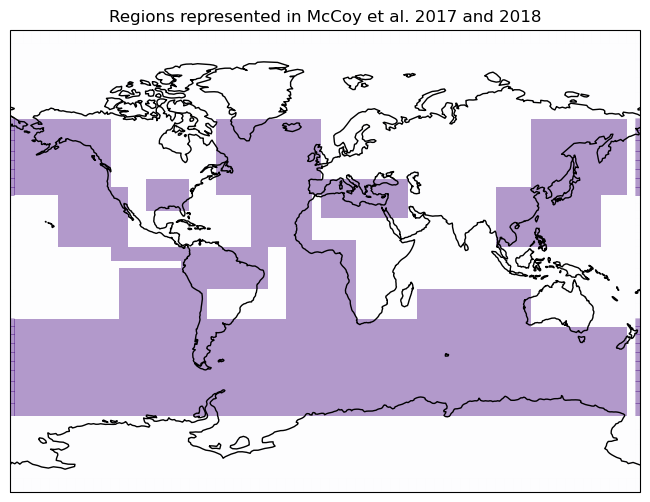

In [15]:
fig = plt.figure(figsize=[14,6])
ax = plt.subplot(projection=ccrs.Miller())
dr_s,lon = add_cyclic_point(np.mean(A1,axis=0), coord=Jongebl_volc_SO4.lon)

color_norm = mpl.colors.Normalize(vmin=0,vmax=0.01)

# 72.5796° N, 38.4592° W are the coordinates of Summit, Greenland
ax.pcolormesh(Jongebl_volc_SO4.lon,Jongebl_volc_SO4.lat,A1,cmap='Purples',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.4)
# ax.plot(-40, 74, 'wo', markersize=3, transform=ccrs.PlateCarree())
# ax.text(-40, 74, 'Summit', transform=ccrs.PlateCarree(),fontsize = 10,color='w')

llon, llat = np.meshgrid(lon,Jongebl_volc_SO4.lat[32:46])
# ax.contour(llon,llat,llat,levels=[40],colors='red',transform=ccrs.PlateCarree(),linewidths=[3],linestyles=['--'],zorder=5)

ax.coastlines()
plt.title('Regions represented in McCoy et al. 2017 and 2018')
dm_nit = plt.cm.ScalarMappable(cmap='Purples',norm=color_norm)
dm_nit.set_array([])
# cbar = plt.colorbar(dm_nit, orientation = 'vertical')
# cbar.set_label('SO$_4$ fraction', rotation=270)

In [16]:
# Here you can uncomment the regions that you'd like to use for sensitivity tests of the RF calculations to
# different parameters in McCoy et al.
# This is how I created my supplementary table S6

# a1_avg = np.mean(A1.isel(lat=slice(32,46)).values[A1.isel(lat=slice(32,46)).values!=0])
# a2_avg = np.mean(A2.isel(lat=slice(32,46)).values[A2.isel(lat=slice(32,46)).values!=0])
# a3_avg = np.mean(A3.isel(lat=slice(32,46)).values[A3.isel(lat=slice(32,46)).values!=0])
# a4_avg = np.mean(A4.isel(lat=slice(32,46)).values[A4.isel(lat=slice(32,46)).values!=0])
# a5_avg = np.mean(A5.isel(lat=slice(32,46)).values[A5.isel(lat=slice(32,46)).values!=0])
# b_avg = np.mean(B.isel(lat=slice(32,46)).values[B.isel(lat=slice(32,46)).values!=0])

# # Southern Ocean
# a1_avg = np.nanmean(A1.isel(lat=slice(5,15)).values)
# a2_avg = np.nanmean(A2.isel(lat=slice(5,15)).values)
# a3_avg = np.nanmean(A3.isel(lat=slice(5,15)).values)
# a4_avg = np.nanmean(A4.isel(lat=slice(5,15)).values)
# a5_avg = np.nanmean(A5.isel(lat=slice(5,15)).values)
# b_avg  = np.nanmean(B.isel(lat=slice(5,15)).values)

# # TEST SENSITIVITY by using Atlantic region values
# a1_avg = 0.24 # sulfate -- this varies quite a lot by region. This value is for -60˚W–0˚E, 40–70˚N. 
# # a1 = 0.08 # value for northeast pacific 180–120˚W, 40–70˚N
# # a1 = 0.11 # value for northwest pacific 120–180˚E, 40–70˚N
# a2_avg = -0.03 # dust
# a3_avg = 0.15 # BC
# a4_avg = -0.03 # OC
# a5_avg = -0.07 # SS
# b_avg  = 2.03 # factor

# TEST SENSITIVITY by taking the average for all regions considered in the study
a1_avg = np.mean(A1.values[A1.values!=0])
a2_avg = np.mean(A2.values[A2.values!=0])
a3_avg = np.mean(A3.values[A3.values!=0])
a4_avg = np.mean(A4.values[A4.values!=0])
a5_avg = np.mean(A5.values[A5.values!=0])
b_avg = np.mean(B.values[B.values!=0])

In [17]:
# Define the Nd calculation depending on which region you're using

def calc_Nd(sulfate,dust,blackC,organicC,seasalt):
    Nd = 10**(a1_avg * np.log10(sulfate) + a2_avg * np.log10(dust) + a3_avg * np.log10(blackC) + 
             a4_avg * np.log10(organicC) + a5_avg * np.log10(seasalt) + b_avg)
    return Nd

In [18]:
# Calculated Nd for each simulation using the selected region(s) above

volc_Nd = calc_Nd(volc_SO4,volc_D_all,volc_BC,volc_OC,volc_SS).isel(lev=slice(0,18))
Jongebl_volc_Nd = calc_Nd(Jongebl_volc_SO4,Jongebl_volc_D_all,Jongebl_volc_BC,Jongebl_volc_OC,Jongebl_volc_SS).isel(lev=slice(0,18))
Jongebl2_volc_Nd = calc_Nd(Jongebl2_volc_SO4,Jongebl2_volc_D_all,Jongebl2_volc_BC,Jongebl2_volc_OC,Jongebl2_volc_SS).isel(lev=slice(0,18))
anthdef_Nd = calc_Nd(anthdef_SO4,anthdef_D_all,anthdef_BC,anthdef_OC,anthdef_SS).isel(lev=slice(0,18))
anthcust1_Nd = calc_Nd(anthcust1_SO4,anthcust1_D_all,anthcust1_BC,anthcust1_OC,anthcust1_SS).isel(lev=slice(0,18))
anthcust2_Nd = calc_Nd(anthcust2_SO4,anthcust2_D_all,anthcust2_BC,anthcust2_OC,anthcust2_SS).isel(lev=slice(0,18))
iceland_volc_Nd = calc_Nd(iceland_volc_SO4,iceland_volc_D_all,iceland_volc_BC,iceland_volc_OC,iceland_volc_SS).isel(lev=slice(0,18))

In [19]:
alpha_c = 0.5 # cloud albedo from Wood et al. (2021)
# It is worth noting that delta_alpha_c below is rather insensitive to alpha_c, such that delta_alpha_c varies 
# by only ~10% as alpha_c changes from 0.3-0.7. Thus, the key sensitivity in the equation is to the value of r_Nd
# default
def_r_Nd = anthdef_Nd / volc_Nd
def_delta_alpha_c = (alpha_c * (1 - alpha_c) * (def_r_Nd**(1/3) - 1))/(1 + alpha_c * (def_r_Nd**(1/3) - 1))
# cust1: H2S scenario in PD and PI
cust1_r_Nd = anthcust1_Nd / Jongebl_volc_Nd
cust1_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust1_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust1_r_Nd**(1/3) - 1))
# cust2: H2S 1.7 scenario in PD and PI
cust2_r_Nd = anthcust2_Nd / Jongebl2_volc_Nd
cust2_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust2_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust2_r_Nd**(1/3) - 1))
# cust3: H2S 1.7 scenario in PI and default in PD
cust3_r_Nd = anthdef_Nd / Jongebl2_volc_Nd
cust3_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust3_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust3_r_Nd**(1/3) - 1))
# cust4: H2S scenario in PD and H2S 1.7 in PI
cust4_r_Nd = anthcust1_Nd / Jongebl2_volc_Nd
cust4_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust4_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust4_r_Nd**(1/3) - 1))
#iceland
iceland_r_Nd = anthcust1_Nd / iceland_volc_Nd
iceland_delta_alpha_c = (alpha_c * (1 - alpha_c) * (iceland_r_Nd**(1/3) - 1))/(1 + alpha_c * (iceland_r_Nd**(1/3) - 1))

In [20]:
# CERES TOA SW Flux Data

cldf_3d = volc_StateMet.Met_CLDF.isel(lev=slice(0,18))

CERES = xr.open_dataset('./previously_published_data/CERES_EBAF-TOA_Ed4.1_Subset_201301-201312-3.nc').isel(time=slice(0,12))
ceres_toa = CERES.solar_mon

ceres_monthly_toa_lat = ceres_toa*0
for i in range(0,12,1):
    for j in range(0,180,1):
        ceres_monthly_toa_lat[i,j,:] = np.mean(ceres_toa[i,j,:])

F_0_18 = cldf_3d*0
for i in range(0,12,1):
    for j in range(0,18,1):
        for k in range(0,45,1):
            F_0_18[i,j,k,:] = np.mean(ceres_monthly_toa_lat.isel(time=i).sel(lat=slice(F_0_18.isel(lat=k).lat.values,F_0_18.isel(lat=k+1).lat.values)))

for i in range(0,12,1):
    for j in range(0,18,1):
        F_0_18[i,j,45,:] = np.mean(ceres_monthly_toa_lat.isel(time=i).sel(lat=slice(F_0_18.isel(lat=44).lat.values,F_0_18.isel(lat=45).lat.values)))

In [21]:
# Calculating grid cell area

lat = np.arange(0,180,1)
lon = np.arange(0,360,1)

h = np.abs(np.sin(ceres_toa.isel(lat=slice(0,179)).lat* np.pi / 180.).values - 
           np.sin(ceres_toa.isel(lat=slice(1,180)).lat* np.pi / 180.).values)

Az = np.ones([360,180]) * 2 * np.pi * np.hstack([h,h[0]])

lonfactor = np.ones([360,180])/360

earth_area = np.transpose(lonfactor * Az)

area_1deg = xr.DataArray(data=earth_area, 
                         dims = ["lat","lon"],
                         coords = dict(lat=(["lat"], lat),lon=(["lon"], lon)))

In [22]:
# Calculating monthly insolation from Ceres
ceres_monthly_toa_lat = ceres_toa*0
for i in range(0,12,1):
    for j in range(0,180,1):
        ceres_monthly_toa_lat[i,j,:] = np.mean(ceres_toa[i,j,:])
        


In [23]:
# Arctic insolation
arctic_toa = np.zeros([12])
for i in range(0,12,1):
    arctic_toa[i] = np.mean(ceres_monthly_toa_lat.isel(time=i,lat=slice(150,180)))

In [24]:
# MODIS cloud data

mcd_1  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013001.061.2020181150322.nc',group='Cloud_Mask_Fraction_Low')
mcd_2  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013032.061.2020181150318.nc',group='Cloud_Mask_Fraction_Low')
mcd_3  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013060.061.2020181150311.nc',group='Cloud_Mask_Fraction_Low')
mcd_4  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013091.061.2020181150319.nc',group='Cloud_Mask_Fraction_Low')
mcd_5  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013121.061.2020181150322.nc',group='Cloud_Mask_Fraction_Low')
mcd_6  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013152.061.2020181150324.nc',group='Cloud_Mask_Fraction_Low')
mcd_7  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013182.061.2020181150324.nc',group='Cloud_Mask_Fraction_Low')
mcd_8  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013213.061.2020181150337.nc',group='Cloud_Mask_Fraction_Low')
mcd_9  = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013244.061.2020181150329.nc',group='Cloud_Mask_Fraction_Low')
mcd_10 = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013274.061.2020181150337.nc',group='Cloud_Mask_Fraction_Low')
mcd_11 = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013305.061.2020181150336.nc',group='Cloud_Mask_Fraction_Low')
mcd_12 = xr.open_dataset('./previously_published_data/MCD_data/MCD06COSP_M3_MODIS.A2013335.061.2020181150348.nc',group='Cloud_Mask_Fraction_Low')


In [25]:
latitude = np.arange(-90,90,1)
longitude = np.arange(-180,180,1)
mcd_xr_1 = xr.DataArray(data=mcd_1.Mean.transpose().values, 
                         dims = ["latitude","longitude"],
                         coords = dict(latitude=(["latitude"], latitude),longitude=(["longitude"], longitude)))

In [26]:
lat = np.arange(-90,90,1)
lon = np.arange(-180,180,1)
time=np.arange(0,12,1)
mcd_xr = xr.DataArray(data=np.array([mcd_1.Mean.transpose().values,
                                     mcd_2.Mean.transpose().values,
                                     mcd_3.Mean.transpose().values,
                                     mcd_4.Mean.transpose().values,
                                     mcd_5.Mean.transpose().values,
                                     mcd_6.Mean.transpose().values,
                                     mcd_7.Mean.transpose().values,
                                     mcd_8.Mean.transpose().values,
                                     mcd_9.Mean.transpose().values,
                                     mcd_10.Mean.transpose().values,
                                     mcd_11.Mean.transpose().values,
                                     mcd_12.Mean.transpose().values]), 
                         dims = ["time","lat","lon"],
                         coords = dict(time=(["time"], time), lat=(["lat"], lat),lon=(["lon"], lon)))

In [27]:
# Monthly cloud fractions weighted by grid cell area
area_global = area_1deg/np.sum(area_1deg) # fraction of global area per grid cell
global_lcldf_mo = mcd_xr * area_global.values

#### Tian and Curry (1989) correction

- No = no other clouds present
- Clow = low clouds present

P(No|Clow) = P(Clow|No) / P(Clow)

Want to solve for probability of Clow given that no other clouds are present:
P(Clow|No) = P(Clow) * P(No|Clow)

For the sake of this study, we will use the Tian and Curry (1989) cloud statistics averaged from stratocumulus/stratus, cumulus, and cumulonimbus clouds:

St (stratus/stratocumulus): 66 occurences at p=0.41 and 59 occurences at p=0.35
Cu (cumulus): 9 occurences at p=0.19; 20 occurences at p=0.54
Cb (cumulonimbus): 2 occurences at p = 0.01; 11 occurences at p=0.43

Average = ( 66 * 0.41 + 59 * 0.35 + 9 * 0.19 + 20 * 0.54 + 2 * 0.01 + 11 * 0.43 ) / (66 + 59 + 9 + 20 + 2 + 11)

In [28]:
p_no_given_Clow = 0.44 # See spreadsheet and Tian and Curry (1989)

# calculate low cloud fraction from modis data and correct for clouds above
p_Clow_given_No = p_no_given_Clow * mcd_xr

print('Bayesian correction factor',np.round(p_no_given_Clow,2))
print('global low cloud fraction with no other clouds present following Tian and Curry (1989):',np.round(np.nanmean(np.nansum(np.nansum(p_Clow_given_No*area_global.values,axis=1),axis=1)),2))


Bayesian correction factor 0.44
global low cloud fraction with no other clouds present following Tian and Curry (1989): 0.22


In [29]:
lat = np.arange(0,180,1)
lon = np.arange(0,360,1)
time=np.arange(0,12,1)
global_lcldf = xr.DataArray(data=global_lcldf_mo, 
                         dims = ["time","lat","lon"],
                         coords = dict(time=(["time"], time), lat=(["lat"], lat),lon=(["lon"], lon)))

In [30]:
arctic_bayes = np.round(np.sum(np.mean(p_Clow_given_No,axis=0)[150:180,:]* (area_1deg[150:180,:]/np.sum(area_1deg[150:180,:])).values),2).values

print('Arctic low cloud fraction based on MODIS and Bayes from Tian and Curry (1989) = ',arctic_bayes)

Arctic low cloud fraction based on MODIS and Bayes from Tian and Curry (1989) =  0.27


In [31]:
# grided monthly cloud fractions corrected following Tian and Curry (1989)
regrid_lat = np.hstack([-89,np.arange(-86,90,4),89])
regrid_lon = np.hstack([np.arange(-180,180,5)])
global_lcldf_mo_interplat = mcd_xr.interp(lat=regrid_lat)
global_lcldf_mo_interp = global_lcldf_mo_interplat.interp(lon=regrid_lon)
global_Clow_mo_interplat = p_Clow_given_No.interp(lat=regrid_lat)
global_Clow_mo_interp = global_Clow_mo_interplat.interp(lon=regrid_lon)

In [32]:
# regrid
cldf_3d_modis = cldf_3d*0
for i in range(0,18,1):
    for j in range(0,12,1):
        cldf_3d_modis[j,i,:,:] = global_lcldf_mo_interp[j,:,:]

cldf_3d_modis_bayes = cldf_3d*0
for i in range(0,18,1):
    for j in range(0,12,1):
        cldf_3d_modis_bayes[j,i,:,:] = global_Clow_mo_interp[j,:,:]

## Albedo Considerations

In [33]:
# we don't want to consider RF above areas of sea ice and snow
volc_albedo = volc_StateMet.Met_ALBD
volc_albedo_ds = volc_albedo.to_dataset()
volc_albedo_ds['mask'] = xr.where(volc_albedo < 0.5,1,0)
albedo_mask = cldf_3d*0
for i in range(0,18,1):
    for j in range(0,12,1):
        albedo_mask[j,i,:,:] = volc_albedo_ds.mask[j,:,:]

# TABLE 1

- This shows column 4 and column 5

In [34]:
arcticA = area[38:46,:]
A = np.sum(arcticA)

month_weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365
phi_atm = 0.7

def_RF   = np.mean(phi_atm * def_delta_alpha_c.values   * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust1_RF = np.mean(phi_atm * cust1_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust2_RF = np.mean(phi_atm * cust2_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust3_RF = np.mean(phi_atm * cust3_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust4_RF = np.mean(phi_atm * cust4_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
ice_RF = np.mean(phi_atm * iceland_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)

area = novolc_StateMet.AREA
arcticA = area[38:46,:]
A = np.sum(arcticA)
default_RF = np.round(np.sum((def_RF[:,38:46,:] * (arcticA/A)).sum(dim=('lat','lon'))*month_weights),2).values
custom1_RF = np.round(np.sum((cust1_RF[:,38:46,:] * (arcticA/A)).sum(dim=('lat','lon'))*month_weights),2).values
custom2_RF = np.round(np.sum((cust2_RF[:,38:46,:] * (arcticA/A)).sum(dim=('lat','lon'))*month_weights),2).values
custom3_RF = np.round(np.sum((cust3_RF[:,38:46,:] * (arcticA/A)).sum(dim=('lat','lon'))*month_weights),2).values
custom4_RF = np.round(np.sum((cust4_RF[:,38:46,:] * (arcticA/A)).sum(dim=('lat','lon'))*month_weights),2).values
iceland_RF = np.round(np.sum((ice_RF[:,38:46,:] * (arcticA/A)).sum(dim=('lat','lon'))*month_weights),2).values

print('Arctic default indirect aerosol RF (W m-2):         ',default_RF)
# print('Arctic H2S indirect aerosol RF (W m-2):             ',custom1_RF)
print('Arctic H2S 1.7 indirect aerosol RF (W m-2):         ',custom2_RF)
print('Arctic def-1.7 indirect aerosol RF (W m-2):         ',custom3_RF)
print('Arctic h2s-1.7 indirect aerosol RF (W m-2):         ',custom4_RF)
print('Arctic def-ice indirect aerosol RF (W m-2):         ',iceland_RF)
print('Difference between default and H2S 1.7 Scenario IRF: ', np.round(custom2_RF - default_RF,2))
print('Difference between default and h2s-1.7 Scenario IRF: ', np.round(custom4_RF - default_RF,2))
print('Difference between default and def-1.7 Scenario IRF: ', np.round(custom3_RF - default_RF,2))
print('Difference between default and Iceland Scenario IRF: ', np.round(iceland_RF - default_RF,2))


Arctic default indirect aerosol RF (W m-2):          -0.45
Arctic H2S 1.7 indirect aerosol RF (W m-2):          -0.34
Arctic def-1.7 indirect aerosol RF (W m-2):          -0.19
Arctic h2s-1.7 indirect aerosol RF (W m-2):          -0.26
Arctic def-ice indirect aerosol RF (W m-2):          0.04
Difference between default and H2S 1.7 Scenario IRF:  0.11
Difference between default and h2s-1.7 Scenario IRF:  0.19
Difference between default and def-1.7 Scenario IRF:  0.26
Difference between default and Iceland Scenario IRF:  0.49


Possibility 1: default PD - H2S 1.7 PI


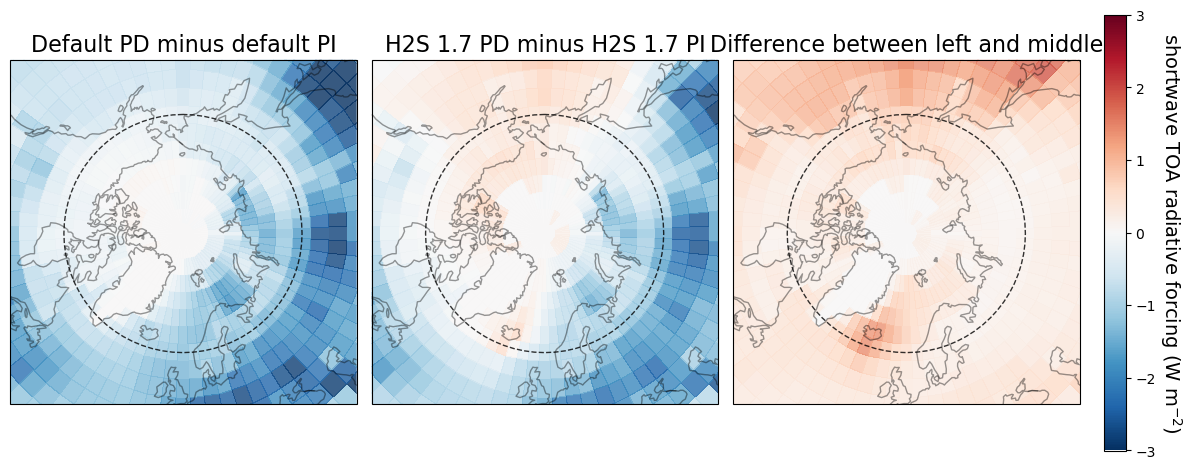

In [35]:
# You can also plot the model output of species concentration in map form!
drs = np.mean(def_RF,axis=0)
data = drs.values

drs2 = np.mean(cust3_RF,axis=0)
data2 = drs2.values

drs3 = drs2 - drs
data3 = data2 - data

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[11,7],squeeze=True)
ax[0] = plt.subplot(131,projection=ccrs.NorthPolarStereo(),position=[0,0.1,0.4,0.8])
ax[1] = plt.subplot(132,projection=ccrs.NorthPolarStereo(),position=[0.402,0.1,0.4,0.8])
ax[2] = plt.subplot(133,projection=ccrs.NorthPolarStereo(),position=[0.802,0.1,0.4,0.8])

a=10
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax[0].pcolormesh(lon,drs.lat,dr_s1,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)

# ax[0].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[0].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[0].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].pcolormesh(lon,drs2.lat,dr_s2,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[1].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[1].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[1].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

ax[2].pcolormesh(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[2].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[2].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[2].coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1.008, 0.188,0.02, 0.6223])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('shortwave TOA radiative forcing (W m$^{-2}$)', rotation = 270,labelpad=20,fontsize=14)
plt.tight_layout()

ax[0].set_title('Default PD minus default PI',fontsize=16)
ax[1].set_title('H2S 1.7 PD minus H2S 1.7 PI',fontsize=16)
ax[2].set_title('Difference between left and middle',fontsize=16)

print('Possibility 1: default PD - H2S 1.7 PI')

### Consider three possibilities: 

- possibility 1: default PD - H2S 1.7 PI
- possibility 2: H2S 1.7 PD - H2S 1.7 PI
- possibility 3: H2S PD - H2S 1.7 PI
- possibility 4: iceland had higher emissions in PI

Possibility 1: default PD - H2S 1.7 PI


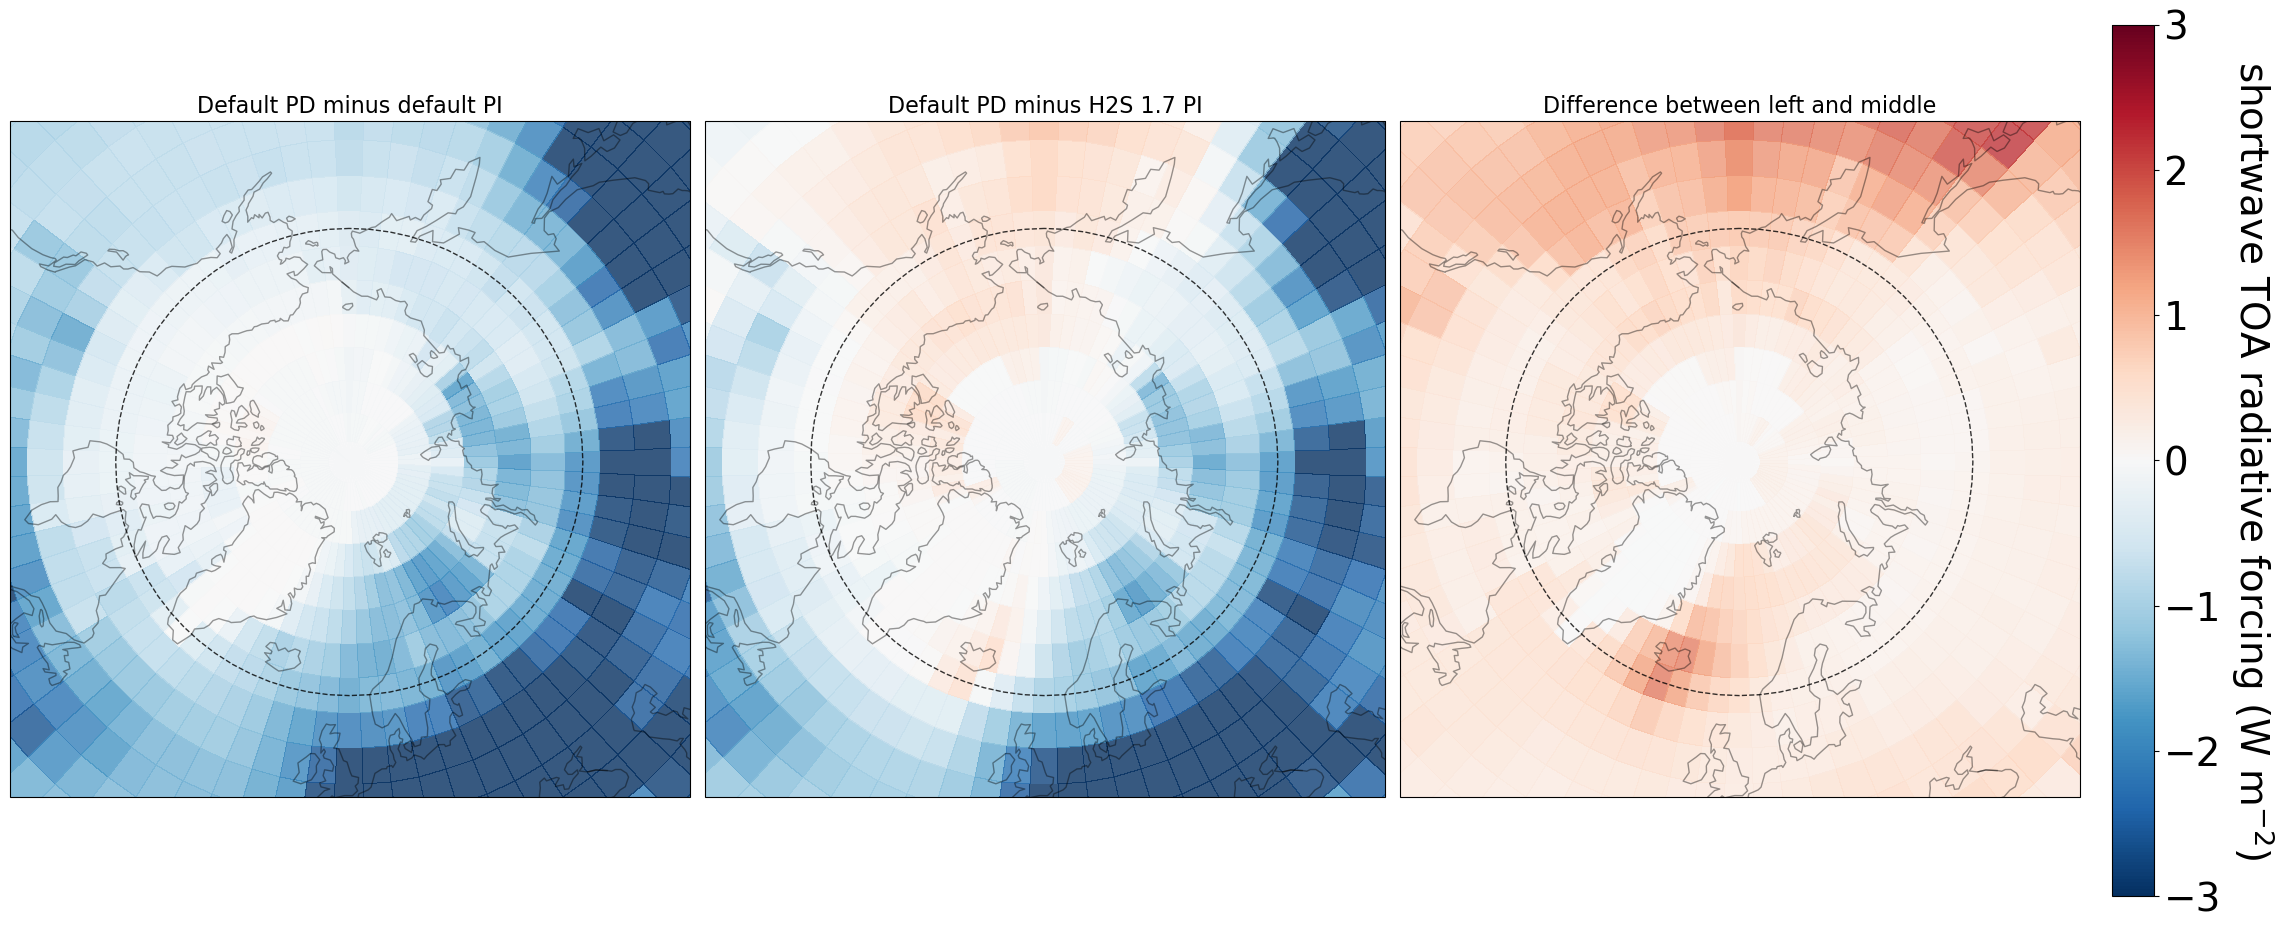

In [36]:
# You can also plot the model output of species concentration in map form!
drs = (anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) + np.mean(def_RF,axis=0)
data = drs.values

drs2 = (anthdef_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) + np.mean(cust3_RF,axis=0)
data2 = drs2.values

drs3 = drs2 - drs
data3 = data2 - data

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[21,14],squeeze=True)
ax[0] = plt.subplot(131,projection=ccrs.NorthPolarStereo(),position=[0,0.1,0.4,0.8])
ax[1] = plt.subplot(132,projection=ccrs.NorthPolarStereo(),position=[0.402,0.1,0.4,0.8])
ax[2] = plt.subplot(133,projection=ccrs.NorthPolarStereo(),position=[0.802,0.1,0.4,0.8])

a=10
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax[0].pcolormesh(lon,drs.lat,dr_s1,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)

# ax[0].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[0].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[0].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].pcolormesh(lon,drs2.lat,dr_s2,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[1].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[1].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[1].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

ax[2].pcolormesh(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[2].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[2].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[2].coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1.008, 0.188,0.02, 0.6223])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('shortwave TOA radiative forcing (W m$^{-2}$)', rotation = 270,labelpad=40,fontsize=28)
plt.tight_layout()
plt.yticks(fontsize=28)

ax[0].set_title('Default PD minus default PI',fontsize=16)
ax[1].set_title('Default PD minus H2S 1.7 PI',fontsize=16)
ax[2].set_title('Difference between left and middle',fontsize=16)

print('Possibility 1: default PD - H2S 1.7 PI')

# TABLE 1

- This shows column 4 rows 1 and 2 and column 5 row 2

In [39]:
# cust1: H2S scenario in PD and PI
# cust2: H2S 1.7 scenario in PD and PI
# cust3: H2S 1.7 scenario in PI and default in PD
# cust4: H2S scenario in PD and H2S 1.7 in PI

default = np.round(default_AllSkySWTOA_PM.values + default_RF,2)
possib1 = np.round(changevolc_AllSkySWTOA_PM2.values + custom3_RF,2)

print('Arctic default indirect aerosol RF (W m-2):         ',default)
# print('Arctic H2S indirect aerosol RF (W m-2):             ',custom1_RF)
print('Arctic H2S 1.7 indirect aerosol RF (W m-2):         ',possib1)
print('Difference between default and H2S 1.7 Scenario IRF: ', np.round(possib1 - default,2))

Arctic default indirect aerosol RF (W m-2):          -0.55
Arctic H2S 1.7 indirect aerosol RF (W m-2):          -0.29
Difference between default and H2S 1.7 Scenario IRF:  0.26


Possibility 2: H2S 1.7 PD - H2S 1.7 PI


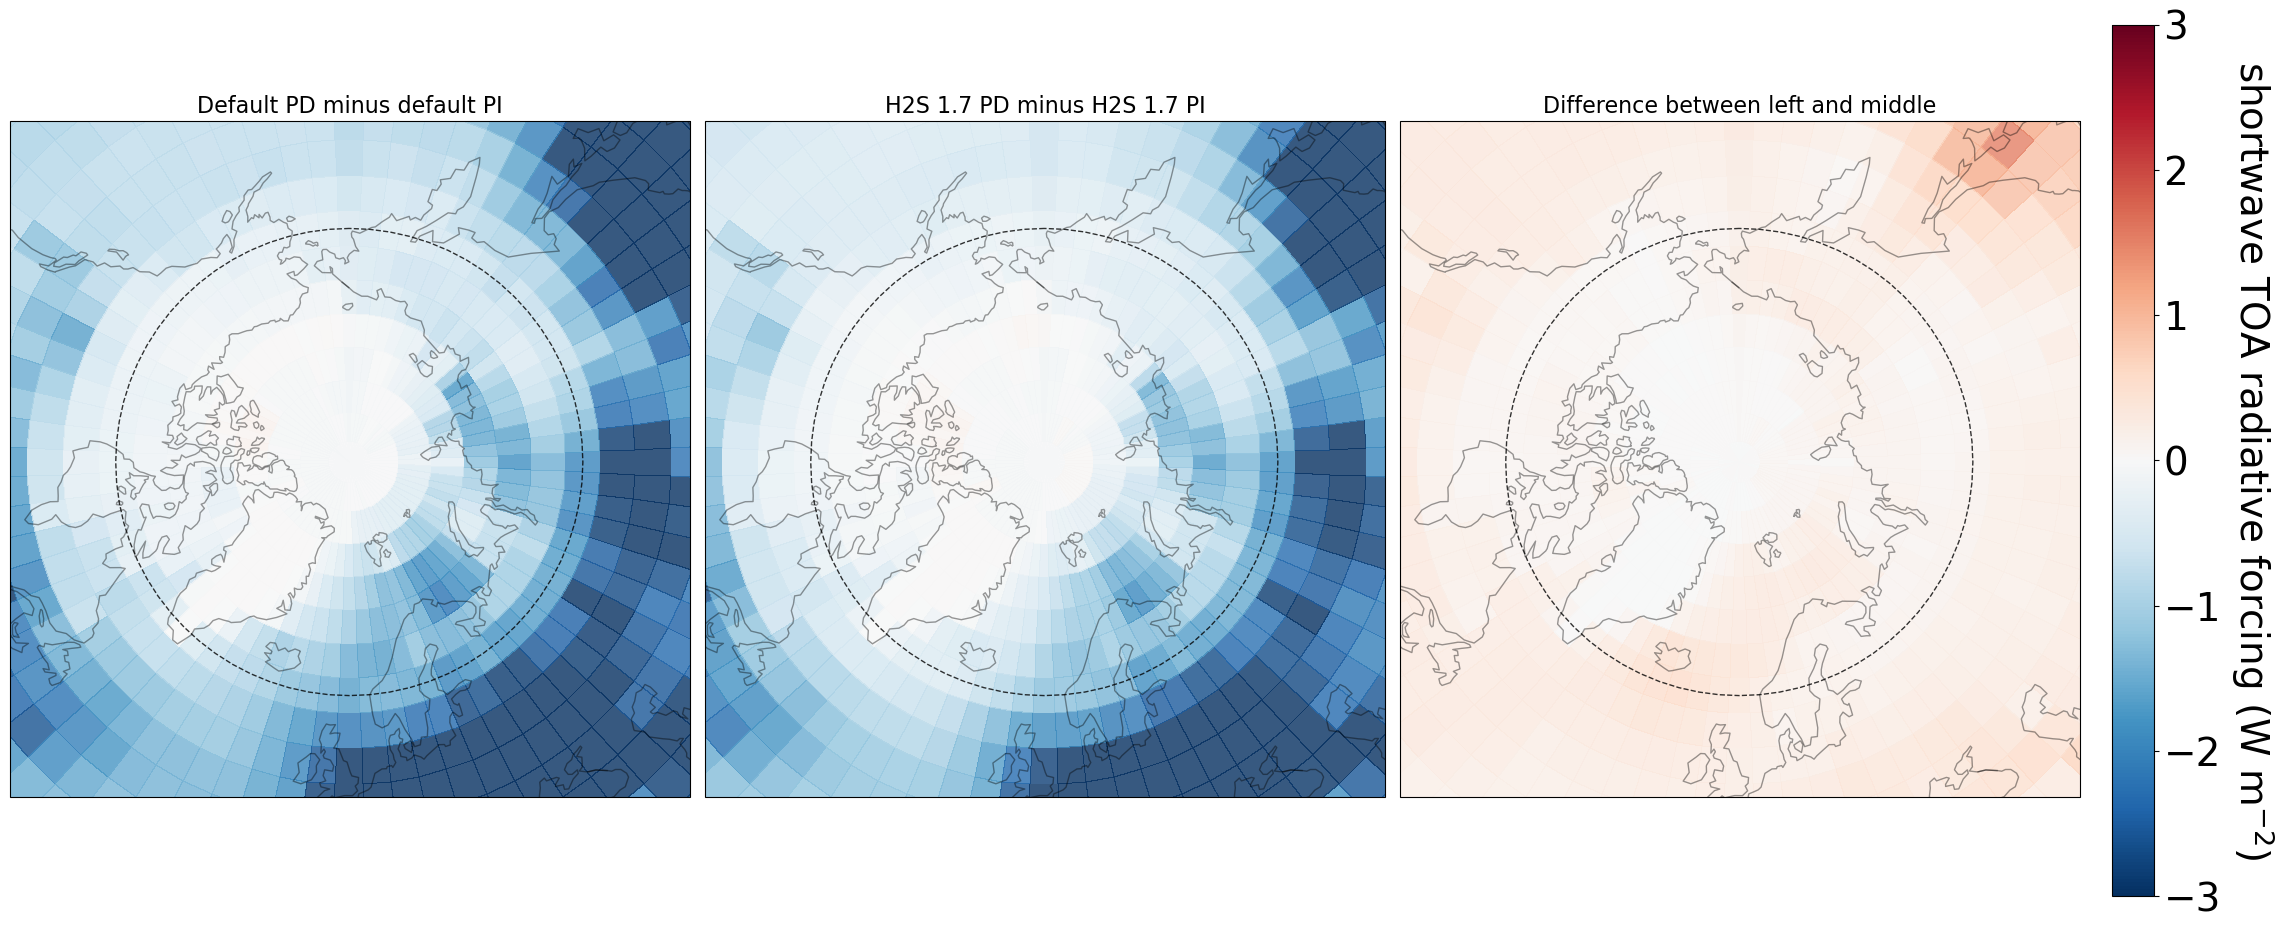

In [40]:

drs = (anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) + np.mean(def_RF,axis=0)
data = drs.values

drs2 = (anthcust2_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) + np.mean(cust2_RF,axis=0)
data2 = drs2.values

drs3 = drs2 - drs
data3 = data2 - data

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[21,14],squeeze=True)
ax[0] = plt.subplot(131,projection=ccrs.NorthPolarStereo(),position=[0,0.1,0.4,0.8])
ax[1] = plt.subplot(132,projection=ccrs.NorthPolarStereo(),position=[0.402,0.1,0.4,0.8])
ax[2] = plt.subplot(133,projection=ccrs.NorthPolarStereo(),position=[0.802,0.1,0.4,0.8])

a=10
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax[0].pcolormesh(lon,drs.lat,dr_s1,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)

# ax[0].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[0].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[0].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].pcolormesh(lon,drs2.lat,dr_s2,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[1].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[1].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[1].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

ax[2].pcolormesh(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[2].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[2].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[2].coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1.008, 0.188,0.02, 0.6223])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('shortwave TOA radiative forcing (W m$^{-2}$)', rotation = 270,labelpad=40,fontsize=28)
plt.tight_layout()
plt.yticks(fontsize=28)

ax[0].set_title('Default PD minus default PI',fontsize=16)
ax[1].set_title('H2S 1.7 PD minus H2S 1.7 PI',fontsize=16)
ax[2].set_title('Difference between left and middle',fontsize=16)

print('Possibility 2: H2S 1.7 PD - H2S 1.7 PI')

# TABLE 1

- This shows column 4 rows 1 and 3 and column 5 row 3

In [41]:
default = default_AllSkySWTOA_PM.values + default_RF
possib2 = Jongebl2_AllSkySWTOA_PM.values + custom2_RF

print('Arctic default indirect aerosol RF (W m-2):         ',np.round(default,2))
# print('Arctic H2S indirect aerosol RF (W m-2):             ',custom1_RF)
print('Arctic H2S 1.7 indirect aerosol RF (W m-2):         ',np.round(possib2,2))
print('Difference between default and H2S 1.7 Scenario IRF: ', np.round(possib2 - default,2))

Arctic default indirect aerosol RF (W m-2):          -0.55
Arctic H2S 1.7 indirect aerosol RF (W m-2):          -0.44
Difference between default and H2S 1.7 Scenario IRF:  0.11


Possibility 2: H2S 1.7 PD - H2S 1.7 PI


Text(0.06, 0.97, 'ΔRF = +0.11 to +0.29 W m$^{-2}$')

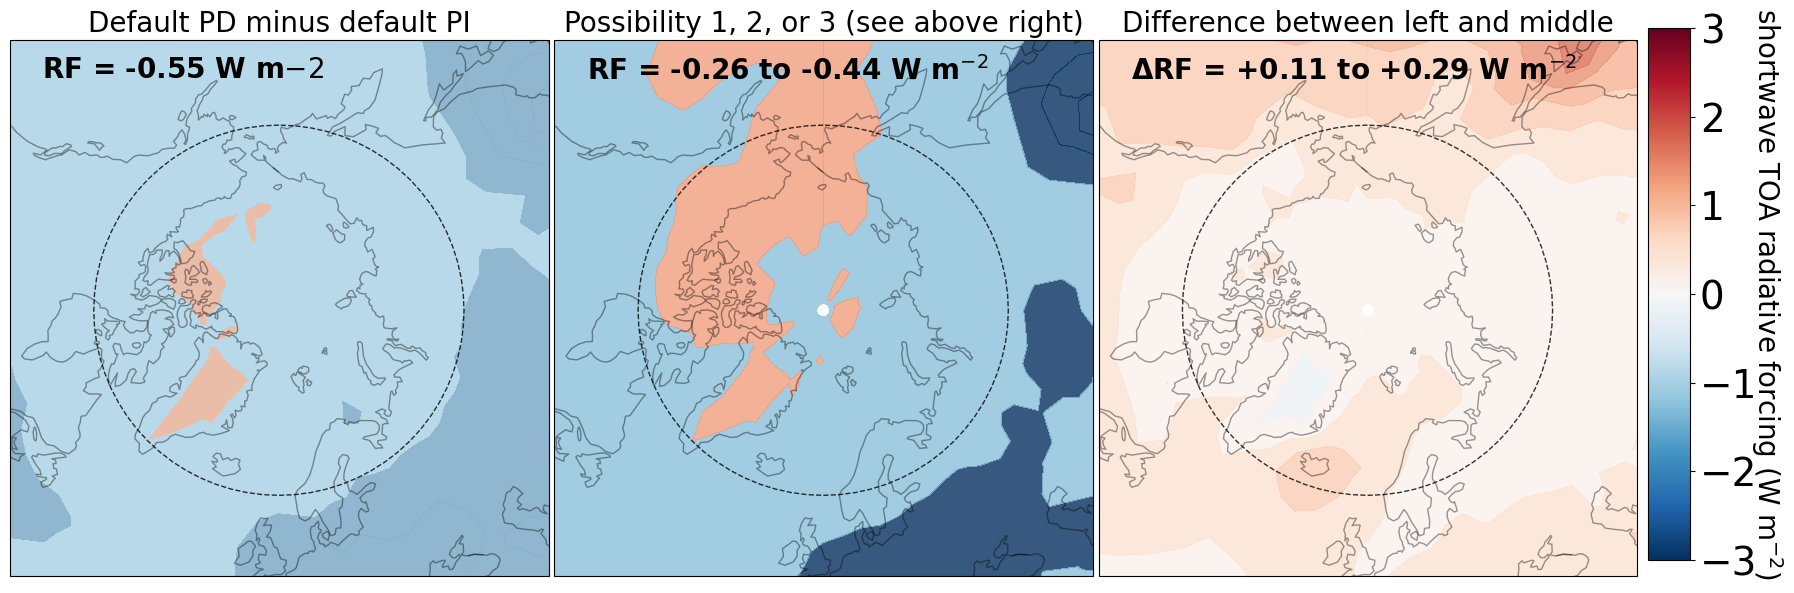

In [42]:
# You can also plot the model output of species concentration in map form!
drs = (anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) + np.mean(def_RF,axis=0)
data = drs.values

drs2 = (anthcust1_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) + np.mean(cust4_RF,axis=0)
data2 = drs2.values

drs3 = drs2 - drs
data3 = data2 - data

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[21,14])

ax[0] = plt.subplot(131,projection=ccrs.NorthPolarStereo(),position=[0,0.1,0.4,0.8])
ax[1] = plt.subplot(132,projection=ccrs.NorthPolarStereo(),position=[0.3,0.1,0.4,0.8])
ax[2] = plt.subplot(133,projection=ccrs.NorthPolarStereo(),position=[0.6,0.1,0.4,0.8])

a=10
j=20
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax[0].contourf(lon,drs.lat,dr_s1,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)

# ax[0].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[0].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[0].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].contourf(lon,drs2.lat,dr_s2,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[1].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[1].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[1].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

ax[2].contourf(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[2].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[2].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[2].coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([0.905, 0.315,0.02, 0.38])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('shortwave TOA radiative forcing (W m$^{-2}$)', rotation = 270,labelpad=20,fontsize=j)
# plt.tight_layout(rect=[0, 0, 0.1, 1.0])
plt.yticks(fontsize=28)

ax[0].set_title('Default PD minus default PI',fontsize=j)
ax[1].set_title('Possibility 1, 2, or 3 (see above right)',fontsize=j)
ax[2].set_title('Difference between left and middle',fontsize=j)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=-10)

print('Possibility 2: H2S 1.7 PD - H2S 1.7 PI')

ax[0].text(0.06, 0.97, 'RF = -0.55 W m${-2}$', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(0.06, 0.97, 'RF = -0.26 to -0.44 W m$^{-2}$', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')
ax[2].text(0.06, 0.97, 'ΔRF = +0.11 to +0.29 W m$^{-2}$', transform=ax[2].transAxes,fontsize=j, fontweight='bold', va='top')

possib1


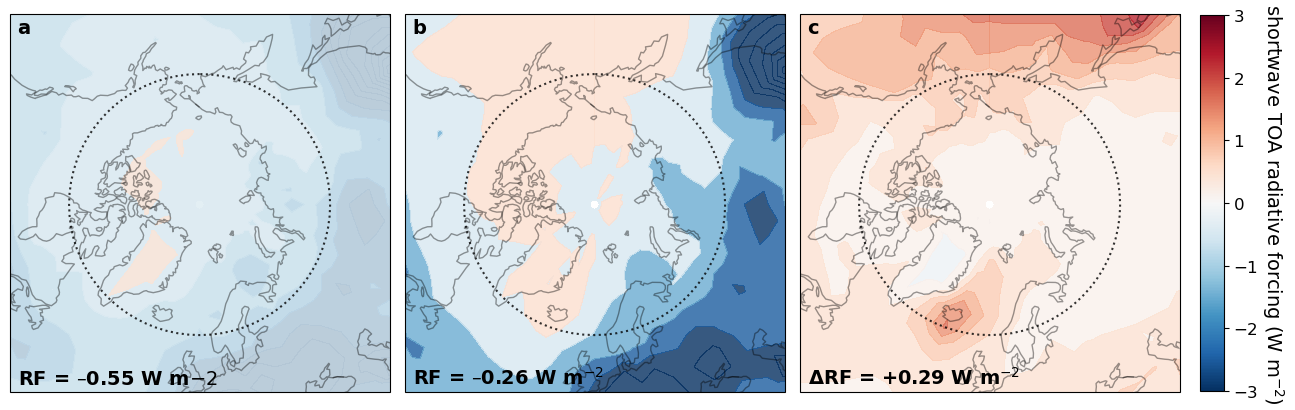

In [43]:
# possibility 1: default in PD, H2S 1.7 in PI
drs = (anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) + np.mean(def_RF,axis=0)
data = drs.values

drs2 = (anthdef_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) + np.mean(cust3_RF,axis=0)
data2 = drs2.values

drs3 = drs2 - drs
data3 = data2 - data

# possibility 2: H2S1.7 in PI and PD

# drs = (anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) + np.mean(def_RF,axis=0)
# data = drs.values

# drs2 = (anthcust1_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) + np.mean(cust4_RF,axis=0)
# data2 = drs2.values

# drs3 = drs2 - drs
# data3 = data2 - data

j=12

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[12,8],squeeze=True)
ax[0] = plt.subplot(131,projection=ccrs.NorthPolarStereo(),position=[0,0.1,0.4,0.8])
ax[1] = plt.subplot(132,projection=ccrs.NorthPolarStereo(),position=[0.3,0.1,0.4,0.8])
ax[2] = plt.subplot(133,projection=ccrs.NorthPolarStereo(),position=[0.6,0.1,0.4,0.8])

a=10
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax[0].contourf(lon,drs.lat,dr_s1,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=20)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1.5],linestyles=[':'],zorder=5,alpha=0.8)

# ax[0].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[0].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[0].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].contourf(lon,drs2.lat,dr_s2,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=20)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1.5],linestyles=[':'],zorder=5,alpha=0.8)
# ax[1].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[1].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[1].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

ax[2].contourf(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=10)
ax[2].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1.5],linestyles=[':'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[2].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[2].coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1.004, 0.265,0.02, 0.47])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('shortwave TOA radiative forcing (W m$^{-2}$)', rotation = 270,labelpad=20,fontsize=j+2)
print('possib1')
ax[0].text(0.02, 0.95, 'a', transform=ax[0].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
ax[1].text(0.02, 0.95, 'b', transform=ax[1].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
ax[2].text(0.02, 0.95, 'c', transform=ax[2].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
ax[0].text(0.02, 0.02, 'RF = –0.55 W m${-2}$', transform=ax[0].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
ax[1].text(0.02, 0.02, 'RF = –0.26 W m$^{-2}$', transform=ax[1].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
ax[2].text(0.02, 0.02, 'ΔRF = +0.29 W m$^{-2}$', transform=ax[2].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
# ax[0].text(0.02, 0.02, 'RF = –0.55 W m${-2}$', transform=ax[0].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
# ax[1].text(0.02, 0.02, 'RF = –0.44 W m$^{-2}$', transform=ax[1].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
# ax[2].text(0.02, 0.02, 'ΔRF = +0.11 W m$^{-2}$', transform=ax[2].transAxes,fontsize=j+2,fontweight='bold',zorder=2)

plt.tick_params(labelsize=j)
plt.tight_layout()

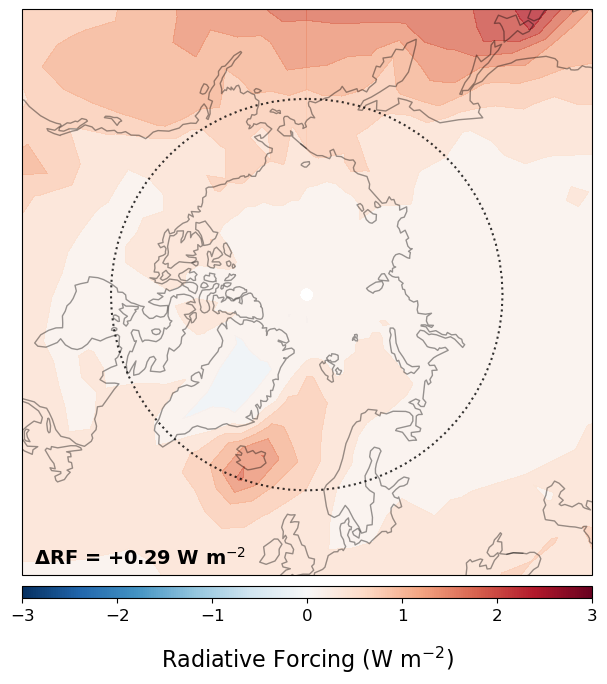

In [44]:
j=12

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=[6,6],squeeze=True)
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
a=10
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax.contourf(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=10)
ax.contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1.5],linestyles=[':'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax.set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax.coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([0.025, -0.01,0.95, 0.02])
cbar = plt.colorbar(dm_nit, orientation = 'horizontal', cax=cax)
cbar.set_label('Radiative Forcing (W m$^{-2}$)', rotation = 0,labelpad=15,fontsize=j+4)
# ax.text(0.02, 0.95, 'c', transform=ax.transAxes,fontsize=j+2,fontweight='bold',zorder=2)
ax.text(0.02, 0.02, 'ΔRF = +0.29 W m$^{-2}$', transform=ax.transAxes,fontsize=j+2,fontweight='bold',zorder=2)
# ax[0].text(0.02, 0.02, 'RF = –0.55 W m${-2}$', transform=ax[0].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
# ax[1].text(0.02, 0.02, 'RF = –0.44 W m$^{-2}$', transform=ax[1].transAxes,fontsize=j+2,fontweight='bold',zorder=2)
# ax[2].text(0.02, 0.02, 'ΔRF = +0.11 W m$^{-2}$', transform=ax[2].transAxes,fontsize=j+2,fontweight='bold',zorder=2)

plt.tick_params(labelsize=j)
plt.tight_layout()

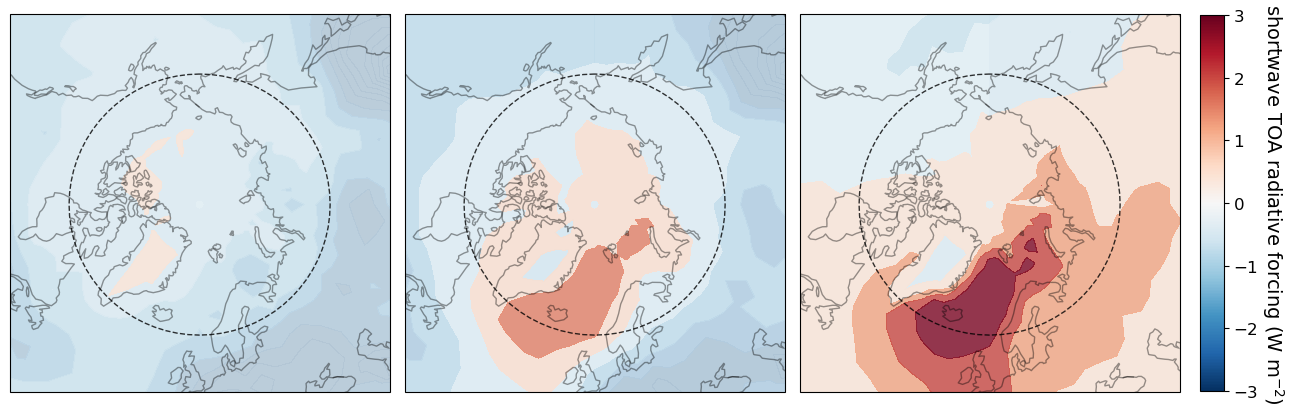

In [45]:
# You can also plot the model output of species concentration in map form!
drs = (anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) + np.mean(def_RF,axis=0)
data = drs.values

drs2 = (anthdef_volc_RadAllSkySWTOA_PM_2013 - iceland_volc_RadAllSkySWTOA_PM_2013) + np.mean(ice_RF,axis=0)
data2 = drs2.values

drs3 = drs2 - drs
data3 = data2 - data

j=12

fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[12,8],squeeze=True)
ax[0] = plt.subplot(131,projection=ccrs.NorthPolarStereo(),position=[0,0.1,0.4,0.8])
ax[1] = plt.subplot(132,projection=ccrs.NorthPolarStereo(),position=[0.3,0.1,0.4,0.8])
ax[2] = plt.subplot(133,projection=ccrs.NorthPolarStereo(),position=[0.6,0.1,0.4,0.8])

a=10
dr_s1,lon = add_cyclic_point(data, coord=drs.lon)
dr_s2,lon = add_cyclic_point(data2, coord=drs2.lon)
dr_s3,lon = add_cyclic_point(data3, coord=drs3.lon)

color_norm = mpl.colors.Normalize(vmin=-3,vmax=3)
llon, llat = np.meshgrid(lon,novolc_SpeciesConc.AREA.lat[38:46])

ax[0].contourf(lon,drs.lat,dr_s1,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=20)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)

# ax[0].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[0].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[0].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].contourf(lon,drs2.lat,dr_s2,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=20)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[1].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[1].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[1].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

ax[2].contourf(lon,drs3.lat,dr_s3,cmap='RdBu_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8,levels=5)
ax[2].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=[1],linestyles=['--'],zorder=5,alpha=0.8)
# ax[2].plot(-38.62, 72.58, 'k*', markersize=6, transform=ccrs.PlateCarree(),alpha=0.8)
# ax[2].text(-46, 62, 'Summit', transform=ccrs.PlateCarree(),fontsize = 14,color='k',alpha=1)
ax[2].set_extent([-180, 90, 50, 90], crs=ccrs.PlateCarree())
ax[2].coastlines(alpha=0.4)


# plt.title('Jongebloed fraction volcanic sulfur')
dm_nit = plt.cm.ScalarMappable(cmap='RdBu_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1.004, 0.265,0.02, 0.47])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('shortwave TOA radiative forcing (W m$^{-2}$)', rotation = 270,labelpad=20,fontsize=j+2)

plt.tick_params(labelsize=j)
plt.tight_layout()


## Sensitivity Testing

In [46]:
# test sensitivity to McCoy constants
# This is how I created table S6

# N Atlantic region values
# a1_avg = 0.24 # sulfate -- this varies quite a lot by region. This value is for -60˚W–0˚E, 40–70˚N. 
# a2_avg = -0.03 # dust
# a3_avg = 0.15 # BC
# a4_avg = -0.03 # OC
# a5_avg = -0.07 # SS
# b_avg  = 2.03 # factor

# N of 40˚ values
# a1_avg = np.mean(A1.isel(lat=slice(32,46)).values[A1.isel(lat=slice(32,46)).values!=0])
# a2_avg = np.mean(A2.isel(lat=slice(32,46)).values[A2.isel(lat=slice(32,46)).values!=0])
# a3_avg = np.mean(A3.isel(lat=slice(32,46)).values[A3.isel(lat=slice(32,46)).values!=0])
# a4_avg = np.mean(A4.isel(lat=slice(32,46)).values[A4.isel(lat=slice(32,46)).values!=0])
# a5_avg = np.mean(A5.isel(lat=slice(32,46)).values[A5.isel(lat=slice(32,46)).values!=0])
# b_avg = np.mean(B.isel(lat=slice(32,46)).values[B.isel(lat=slice(32,46)).values!=0])

# Southern Ocean
# a1_avg = np.nanmean(A1.isel(lat=slice(5,15)).values)
# a2_avg = np.nanmean(A2.isel(lat=slice(5,15)).values)
# a3_avg = np.nanmean(A3.isel(lat=slice(5,15)).values)
# a4_avg = np.nanmean(A4.isel(lat=slice(5,15)).values)
# a5_avg = np.nanmean(A5.isel(lat=slice(5,15)).values)
# b_avg  = np.nanmean(B.isel(lat=slice(5,15)).values)

# # # TEST SENSITIVITY by taking the average for all regions considered in the study
a1_avg = np.mean(A1.values[A1.values!=0])
a2_avg = np.mean(A2.values[A2.values!=0])
a3_avg = np.mean(A3.values[A3.values!=0])
a4_avg = np.mean(A4.values[A4.values!=0])
a5_avg = np.mean(A5.values[A5.values!=0])
b_avg = np.mean(B.values[B.values!=0])

def calc_Nd(sulfate,dust,blackC,organicC,seasalt):
    Nd = 10**(a1_avg * np.log10(sulfate) + a2_avg * np.log10(dust) + a3_avg * np.log10(blackC) + 
             a4_avg * np.log10(organicC) + a5_avg * np.log10(seasalt) + b_avg)
    return Nd

# calculate Nd for different simulations
volc_Nd = calc_Nd(volc_SO4,volc_D_all,volc_BC,volc_OC,volc_SS).isel(lev=slice(0,18))
Jongebl_volc_Nd = calc_Nd(Jongebl_volc_SO4,Jongebl_volc_D_all,Jongebl_volc_BC,Jongebl_volc_OC,Jongebl_volc_SS).isel(lev=slice(0,18))
Jongebl2_volc_Nd = calc_Nd(Jongebl2_volc_SO4,Jongebl2_volc_D_all,Jongebl2_volc_BC,Jongebl2_volc_OC,Jongebl2_volc_SS).isel(lev=slice(0,18))
anthdef_Nd = calc_Nd(anthdef_SO4,anthdef_D_all,anthdef_BC,anthdef_OC,anthdef_SS).isel(lev=slice(0,18))
anthcust1_Nd = calc_Nd(anthcust1_SO4,anthcust1_D_all,anthcust1_BC,anthcust1_OC,anthcust1_SS).isel(lev=slice(0,18))
anthcust2_Nd = calc_Nd(anthcust2_SO4,anthcust2_D_all,anthcust2_BC,anthcust2_OC,anthcust2_SS).isel(lev=slice(0,18))

In [47]:
# alpha_c = 0.3
alpha_c = 0.5
# alpha_c = 0.7

# phi_atm = 0.66
phi_atm = 0.7

# F_0_18_sens = F_0_18 -5
F_0_18_sens = F_0_18 
# F_0_18_sens = F_0_18 +5

# cldf_3d_sens = cldf_3d_modis_bayes
cldf_3d_sens = cldf_3d_modis*0 + 0.32

def_r_Nd = anthdef_Nd / volc_Nd
def_delta_alpha_c = (alpha_c * (1 - alpha_c) * (def_r_Nd**(1/3) - 1))/(1 + alpha_c * (def_r_Nd**(1/3) - 1))
cust1_r_Nd = anthcust1_Nd / Jongebl_volc_Nd
cust1_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust1_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust1_r_Nd**(1/3) - 1))
cust2_r_Nd = anthcust2_Nd / Jongebl2_volc_Nd
cust2_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust2_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust2_r_Nd**(1/3) - 1))
cust3_r_Nd = anthdef_Nd / Jongebl2_volc_Nd
cust3_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust3_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust3_r_Nd**(1/3) - 1))

def_RF   = np.mean(phi_atm * def_delta_alpha_c.values   * cldf_3d_sens.values * -F_0_18_sens * albedo_mask,axis=1)
cust1_RF = np.mean(phi_atm * cust1_delta_alpha_c.values * cldf_3d_sens.values * -F_0_18_sens * albedo_mask,axis=1)
cust2_RF = np.mean(phi_atm * cust2_delta_alpha_c.values * cldf_3d_sens.values * -F_0_18_sens * albedo_mask,axis=1)
cust3_RF = np.mean(phi_atm * cust3_delta_alpha_c.values * cldf_3d_sens.values * -F_0_18_sens * albedo_mask,axis=1)
cust4_RF = np.mean(phi_atm * cust4_delta_alpha_c.values * cldf_3d_sens.values * -F_0_18_sens * albedo_mask,axis=1)
area = novolc_StateMet.AREA
default_RF = np.round(np.sum(np.sum(np.sum(def_RF[:,38:46,:] * arcticA/A,axis=1),axis=1)*month_weights),2).values
custom1_RF = np.round(np.sum(np.sum(np.sum(cust1_RF[:,38:46,:] * arcticA/A,axis=1),axis=1)*month_weights),2).values
custom2_RF = np.round(np.sum(np.sum(np.sum(cust2_RF[:,38:46,:] * arcticA/A,axis=1),axis=1)*month_weights),2).values
custom3_RF = np.round(np.sum(np.sum(np.sum(cust3_RF[:,38:46,:] * arcticA/A,axis=1),axis=1)*month_weights),2).values
print('Difference between default and H2S 1.7 Scenario IRF: ', np.round(custom2_RF - default_RF,2))
print('Fractional change  default and H2S 1.7 Scenario IRF: ', np.round((custom2_RF - default_RF)/default_RF,2))

Difference between default and H2S 1.7 Scenario IRF:  0.12
Fractional change  default and H2S 1.7 Scenario IRF:  -0.23


## Global DRF and IRF calculations

In [48]:
area
A = np.sum(area)

In [49]:
default_AllSkySWTOA_PM_global = np.sum((anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013)*area/A)
Jongebl2_AllSkySWTOA_PM_global = np.sum((anthcust2_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013)*area/A)
# changevolc_ClrSkySWTOA_SU = np.mean((anthdef_volc_RadClrSkySWTOA_SU_2013)[37:46,:] - (Jongebl_volc_RadClrSkySWTOA_SU_2013)[37:46,:])
# changevolc_ClrSkySWTOA_SU2 = np.mean((anthdef_volc_RadClrSkySWTOA_SU_2013)[37:46,:] - (Jongebl2_volc_RadClrSkySWTOA_SU_2013)[37:46,:])


changevolc_AllSkySWTOA_PM_global = (np.sum((anthdef_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013)*area/A))
changevolc_AllSkySWTOA_PM_h2s_global = (np.sum((anthcust1_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013)*area/A))

print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('GLOBAL CALCS')
print('Default present day minus preindustrial PM all sky TOA radiative forcing (W m^-2)                =', np.round(default_AllSkySWTOA_PM_global.values,2))
# print('Scenario 1 present day minus Scenario 1 preindustrial sulfate clear sky TOA radiative forcing (W m^-2)  =', np.round(Jongebl_ClrSkySWTOA_SU.values,2))
print('Scenario 2 present day minus Scenario 2 preindustrial PM all sky TOA radiative forcing (W m^-2)  =', np.round(Jongebl2_AllSkySWTOA_PM_global.values,2))
# print('Default present day minus Scenario 1 preindustrial sulfate clear sky TOA radiative forcing (W m^-2)     =', np.round(changevolc_ClrSkySWTOA_SU.values,2))
print('Default present day minus Scenario 2 preindustrial sulfate all sky TOA radiative forcing (W m^-2)     =', np.round(changevolc_AllSkySWTOA_PM_global.values,2))


print('DIFFERENCE between (1) default PD - PI and (2) PD minus Scenario 1 PI PM all sky TOA RF (W m^-2) =', np.round(changevolc_AllSkySWTOA_PM_h2s_global.values-default_AllSkySWTOA_PM_global.values,2))
print('DIFFERENCE between (1) default PD - scenario 2 PI and (2) default PD minus default PI (W m^-2)          =', np.round(changevolc_AllSkySWTOA_PM_global.values - default_AllSkySWTOA_PM_global.values,2))
print('--------------------------------------------------------------------------------------------------------------')
print('This means that sulfate RF would be 0.02 W m-2 LESS NEGATIVE if emissions were higher in the PI than today.')
print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')


:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
GLOBAL CALCS
Default present day minus preindustrial PM all sky TOA radiative forcing (W m^-2)                = -0.48
Scenario 2 present day minus Scenario 2 preindustrial PM all sky TOA radiative forcing (W m^-2)  = -0.48
Default present day minus Scenario 2 preindustrial sulfate all sky TOA radiative forcing (W m^-2)     = -0.41
DIFFERENCE between (1) default PD - PI and (2) PD minus Scenario 1 PI PM all sky TOA RF (W m^-2) = 0.05
DIFFERENCE between (1) default PD - scenario 2 PI and (2) default PD minus default PI (W m^-2)          = 0.07
--------------------------------------------------------------------------------------------------------------
This means that sulfate RF would be 0.02 W m-2 LESS NEGATIVE if emissions were higher in the PI than today.
:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


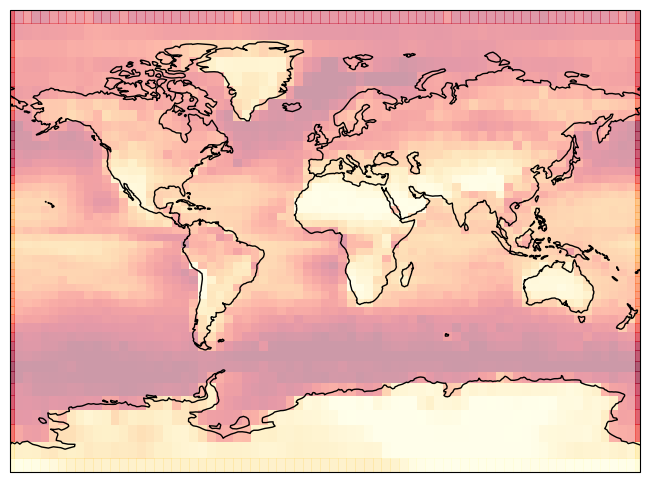

In [50]:
fig = plt.figure(figsize=[14,6])
ax = plt.subplot(projection=ccrs.Miller())
dr_s,lon = add_cyclic_point(np.mean(np.mean(cldf_3d_modis_bayes,axis=0),axis=0), coord=cldf_3d_modis_bayes.lon)

color_norm = mpl.colors.Normalize(vmin=0,vmax=0.4)

# 72.5796° N, 38.4592° W are the coordinates of Summit, Greenland
ax.pcolormesh(lon,cldf_3d_modis_bayes.lat,dr_s,cmap='YlOrRd',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.4)
# ax.plot(-40, 74, 'wo', markersize=3, transform=ccrs.PlateCarree())
# ax.text(-40, 74, 'Summit', transform=ccrs.PlateCarree(),fontsize = 10,color='w')

# llon, llat = np.meshgrid(lon,cldf_3d_modis_bayes.lat[32:46])
# ax.contour(llon,llat,llat,levels=[40],colors='red',transform=ccrs.PlateCarree(),linewidths=[3],linestyles=['--'],zorder=5)

ax.coastlines()
# plt.title('Fraction biogenic+volcanic SO$_4$ burden (kg) in 2013')
dm_nit = plt.cm.ScalarMappable(cmap='YlOrRd',norm=color_norm)
dm_nit.set_array([])
# cbar = plt.colorbar(dm_nit, orientation = 'vertical')
# cbar.set_label('Cloud fraction (Bayes)', rotation=270)

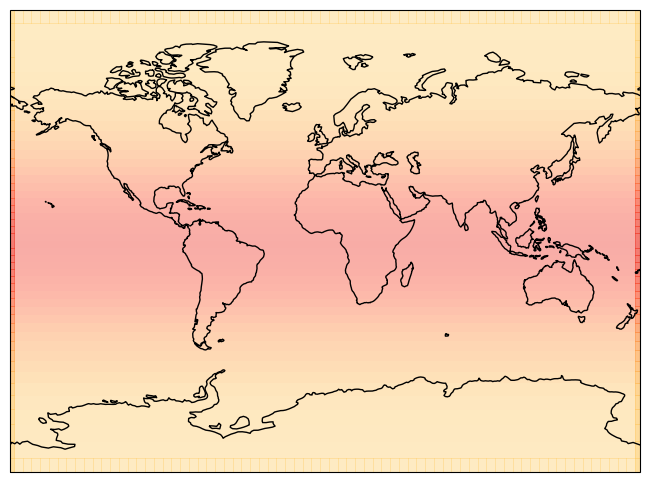

In [51]:
fig = plt.figure(figsize=[14,6])
ax = plt.subplot(projection=ccrs.Miller())
dr_s,lon = add_cyclic_point(np.mean(np.mean(F_0_18,axis=0),axis=0), coord=cldf_3d_modis_bayes.lon)

color_norm = mpl.colors.Normalize(vmin=0,vmax=600)

# 72.5796° N, 38.4592° W are the coordinates of Summit, Greenland
ax.pcolormesh(lon,F_0_18.lat,dr_s,cmap='YlOrRd',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.4)
# ax.plot(-40, 74, 'wo', markersize=3, transform=ccrs.PlateCarree())
# ax.text(-40, 74, 'Summit', transform=ccrs.PlateCarree(),fontsize = 10,color='w')

# llon, llat = np.meshgrid(lon,cldf_3d_modis_bayes.lat[32:46])
# ax.contour(llon,llat,llat,levels=[40],colors='red',transform=ccrs.PlateCarree(),linewidths=[3],linestyles=['--'],zorder=5)

ax.coastlines()
# plt.title('Fraction biogenic+volcanic SO$_4$ burden (kg) in 2013')
dm_nit = plt.cm.ScalarMappable(cmap='YlOrRd',norm=color_norm)
dm_nit.set_array([])
# cbar = plt.colorbar(dm_nit, orientation = 'vertical')
# cbar.set_label('Insolation (W m-2)', rotation=270)

In [52]:
alpha_c = 0.5 # cloud albedo from Wood et al. (2021)

def_r_Nd = anthdef_Nd / volc_Nd
def_delta_alpha_c = (alpha_c * (1 - alpha_c) * (def_r_Nd**(1/3) - 1))/(1 + alpha_c * (def_r_Nd**(1/3) - 1))

cust1_r_Nd = anthcust1_Nd / Jongebl_volc_Nd
cust1_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust1_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust1_r_Nd**(1/3) - 1))

cust2_r_Nd = anthcust2_Nd / Jongebl2_volc_Nd
cust2_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust2_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust2_r_Nd**(1/3) - 1))

cust3_r_Nd = anthdef_Nd / Jongebl2_volc_Nd
cust3_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust3_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust3_r_Nd**(1/3) - 1))

cust4_r_Nd = anthcust1_Nd / Jongebl2_volc_Nd
cust4_delta_alpha_c = (alpha_c * (1 - alpha_c) * (cust4_r_Nd**(1/3) - 1))/(1 + alpha_c * (cust4_r_Nd**(1/3) - 1))

In [53]:
area = novolc_StateMet.AREA
A = np.sum(area)

month_weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365
phi_atm = 0.7

def_RF   = np.mean(phi_atm * def_delta_alpha_c.values   * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust1_RF = np.mean(phi_atm * cust1_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust2_RF = np.mean(phi_atm * cust2_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust3_RF = np.mean(phi_atm * cust3_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)
cust4_RF = np.mean(phi_atm * cust4_delta_alpha_c.values * cldf_3d_modis_bayes.values * -F_0_18 * albedo_mask,axis=1)

drf_def = np.round(np.sum(np.sum((anthdef_volc_RadAllSkySWTOA_PM_2013 - volc_RadAllSkySWTOA_PM_2013) * area/A,axis=0),axis=0),2).values
drf_h2s_17 = np.round(np.sum(np.sum((anthcust1_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) * area/A,axis=0),axis=0),2).values
drf_h2s_h2s = np.round(np.sum(np.sum((anthcust1_volc_RadAllSkySWTOA_PM_2013 - Jongebl_volc_RadAllSkySWTOA_PM_2013) * area/A,axis=0),axis=0),2).values
drf_17_17 = np.round(np.sum(np.sum((anthcust2_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) * area/A,axis=0),axis=0),2).values
drf_def_17 = np.round(np.sum(np.sum((anthdef_volc_RadAllSkySWTOA_PM_2013 - Jongebl2_volc_RadAllSkySWTOA_PM_2013) * area/A,axis=0),axis=0),2).values
drf_def_h2s = np.round(np.sum(np.sum((anthdef_volc_RadAllSkySWTOA_PM_2013 - Jongebl_volc_RadAllSkySWTOA_PM_2013) * area/A,axis=0),axis=0),2).values


default_RF = np.round(np.sum(np.sum(np.sum(def_RF * area/A,axis=1),axis=1)*month_weights).values + drf_def,2)
custom1_RF = np.round(np.sum(np.sum(np.sum(cust1_RF * area/A,axis=1),axis=1)*month_weights).values + drf_h2s_h2s,2) # h2s in PD and h2s PI
custom2_RF = np.round(np.sum(np.sum(np.sum(cust2_RF * area/A,axis=1),axis=1)*month_weights).values + drf_17_17,2) # h2s 1.7 in PD, h2s 1.7 in PI
custom3_RF = np.round(np.sum(np.sum(np.sum(cust3_RF * area/A,axis=1),axis=1)*month_weights).values  + drf_def_17,2)# def in PD, h2s 1.7 in PI
custom4_RF = np.round(np.sum(np.sum(np.sum(cust4_RF * area/A,axis=1),axis=1)*month_weights).values + drf_h2s_17,2) # h2s in PD and h2s 1.7 PI


print('Global default DRF + IRF (W m-2):                   ',default_RF)
# print('Global H2S indirect aerosol RF (W m-2):             ',custom1_RF)
print('Global 1.7-1.7 DRF + IRF (W m-2):                   ',custom2_RF)
print('Global def-1.7 DRF + IRF (W m-2):                   ',custom3_RF)
print('Global h2s-1.7 indirect aerosol RF (W m-2):         ',custom4_RF)
print('Difference between default and 1.7-1.7 Scenario RF:  ', np.round(custom2_RF - default_RF,2))
# print('Difference between default and h2s-h2s Scenario IRF: ', np.round(custom1_RF - default_RF,2))
print('Difference between default and def-1.7 Scenario RF:  ', np.round(custom3_RF - default_RF,2))
# print('Difference between default and def-h2s Scenario IRF: ', np.round(custom4_RF - default_RF,2))

Global default DRF + IRF (W m-2):                    -1.26
Global 1.7-1.7 DRF + IRF (W m-2):                    -1.04
Global def-1.7 DRF + IRF (W m-2):                    -0.74
Global h2s-1.7 indirect aerosol RF (W m-2):          -0.86
Difference between default and 1.7-1.7 Scenario RF:   0.22
Difference between default and def-1.7 Scenario RF:   0.52
